<a href="https://colab.research.google.com/github/nikhilbordekar/8-Week-SQL-Challenge/blob/main/8_Weeks_SQL_Challenge_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASE STUDY #2 FOODIE-FI**

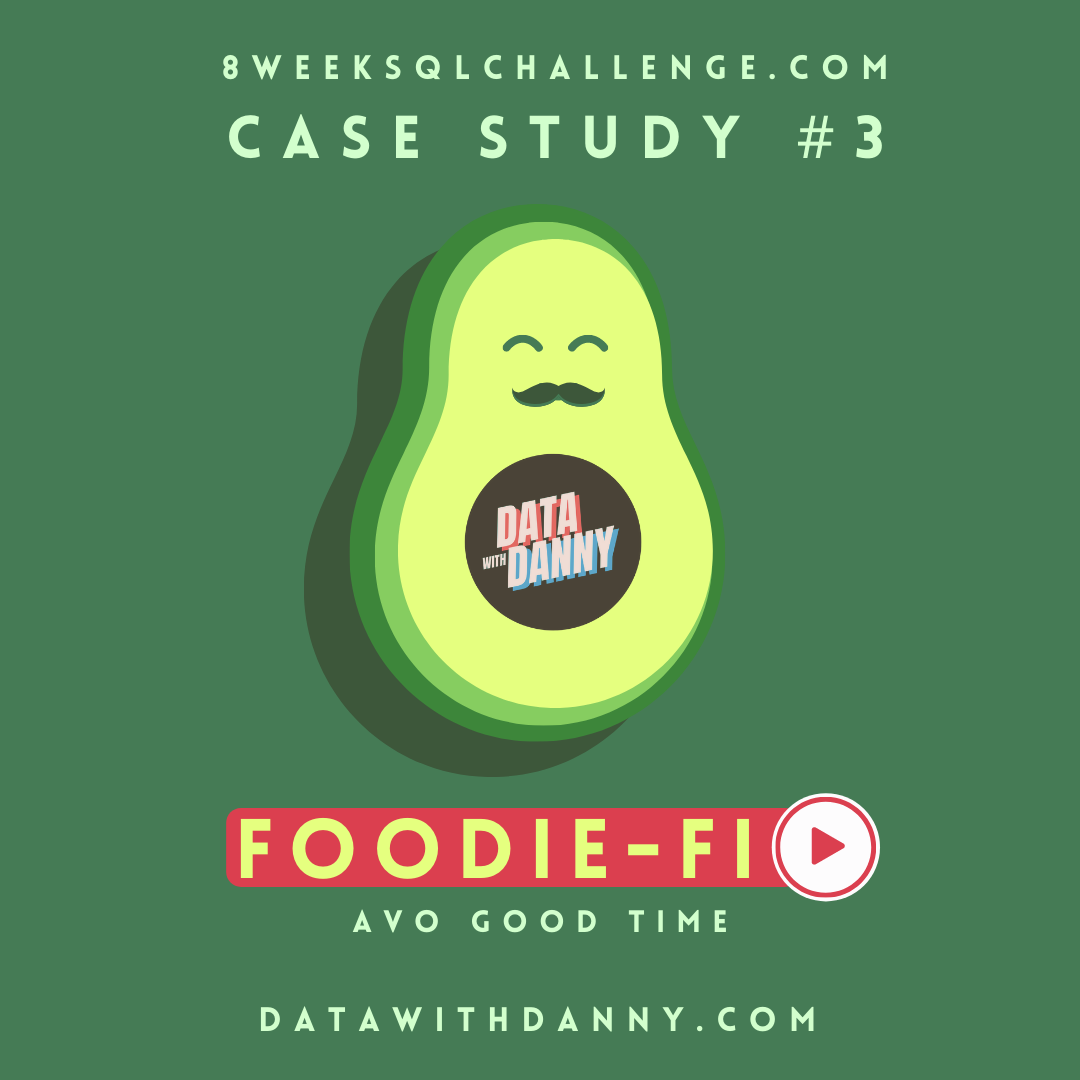

**Introduction**

Subscription based businesses are super popular and Danny realised that there was a large gap in the market - he wanted to create a new streaming service that only had food related content - something like Netflix but with only cooking shows!


Danny finds a few smart friends to launch his new startup Foodie-Fi in 2020 and started selling monthly and annual subscriptions, giving their customers unlimited on-demand access to exclusive food videos from around the world!

Danny created Foodie-Fi with a data driven mindset and wanted to ensure all future investment decisions and new features were decided using data. This case study focuses on using subscription style digital data to answer important business questions.

**Available Data**

Danny has shared the data design for Foodie-Fi and also short descriptions on each of the database tables - our case study focuses on only 2 tables but there will be a challenge to create a new table for the Foodie-Fi team.

All datasets exist within the foodie_fi database schema - be sure to include this reference within your SQL scripts as you start exploring the data and answering the case study questions.

**Entity Relationship Diagram**

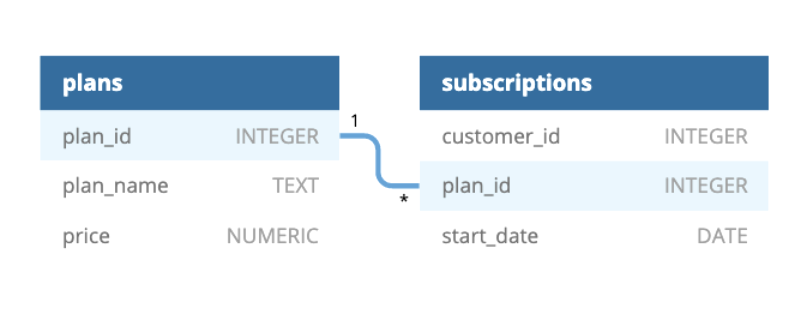

**Table 1: plans**

Customers can choose which plans to join Foodie-Fi when they first sign up.

Basic plan customers have limited access and can only stream their videos and is only available monthly at $9.90

Pro plan customers have no watch time limits and are able to download videos for offline viewing. Pro plans start at 19.90 a month or $199 for an annual subscription.

Customers can sign up to an initial 7 day free trial will automatically continue with the pro monthly subscription plan unless they cancel, downgrade to basic or upgrade to an annual pro plan at any point during the trial.

When customers cancel their Foodie-Fi service - they will have a churn plan record with a null price but their plan will continue until the end of the billing period.

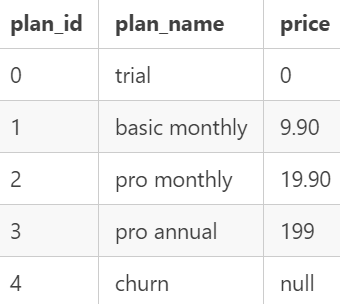

**Table 2: subscriptions**


Customer subscriptions show the exact date where their specific plan_id starts.

If customers downgrade from a pro plan or cancel their subscription - the higher plan will remain in place until the period is over - the start_date in the subscriptions table will reflect the date that the actual plan changes.

When customers upgrade their account from a basic plan to a pro or annual pro plan - the higher plan will take effect straightaway.

When customers churn - they will keep their access until the end of their current billing period but the start_date will be technically the day they decided to cancel their service.

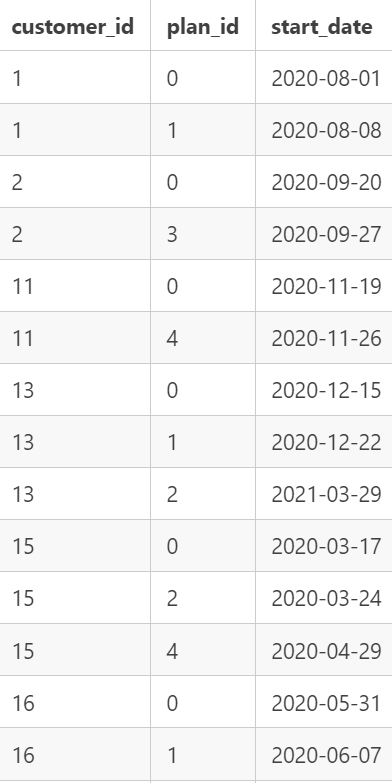



# **DATA**

```SQL
CREATE SCHEMA foodie_fi;
SET search_path = foodie_fi;

CREATE TABLE plans (
  plan_id INTEGER,
  plan_name VARCHAR(13),
  price DECIMAL(5,2)
);

INSERT INTO plans
  (plan_id, plan_name, price)
VALUES
  ('0', 'trial', '0'),
  ('1', 'basic monthly', '9.90'),
  ('2', 'pro monthly', '19.90'),
  ('3', 'pro annual', '199'),
  ('4', 'churn', null);



CREATE TABLE subscriptions (
  customer_id INTEGER,
  plan_id INTEGER,
  start_date DATE
);

INSERT INTO subscriptions
  (customer_id, plan_id, start_date)
VALUES
  ('1', '0', '2020-08-01'),
  ('1', '1', '2020-08-08'),
  ('2', '0', '2020-09-20'),
  ('2', '3', '2020-09-27'),
  ('3', '0', '2020-01-13'),
  ('3', '1', '2020-01-20'),
  ('4', '0', '2020-01-17'),
  ('4', '1', '2020-01-24'),
  ('4', '4', '2020-04-21'),
  ('5', '0', '2020-08-03'),
  ('5', '1', '2020-08-10'),
  ('6', '0', '2020-12-23'),
  ('6', '1', '2020-12-30'),
  ('6', '4', '2021-02-26'),
  ('7', '0', '2020-02-05'),
  ('7', '1', '2020-02-12'),
  ('7', '2', '2020-05-22'),
  ('8', '0', '2020-06-11'),
  ('8', '1', '2020-06-18'),
  ('8', '2', '2020-08-03'),
  ('9', '0', '2020-12-07'),
  ('9', '3', '2020-12-14'),
  ('10', '0', '2020-09-19'),
  ('10', '2', '2020-09-26'),
  ('11', '0', '2020-11-19'),
  ('11', '4', '2020-11-26'),
  ('12', '0', '2020-09-22'),
  ('12', '1', '2020-09-29'),
  ('13', '0', '2020-12-15'),
  ('13', '1', '2020-12-22'),
  ('13', '2', '2021-03-29'),
  ('14', '0', '2020-09-22'),
  ('14', '1', '2020-09-29'),
  ('15', '0', '2020-03-17'),
  ('15', '2', '2020-03-24'),
  ('15', '4', '2020-04-29'),
  ('16', '0', '2020-05-31'),
  ('16', '1', '2020-06-07'),
  ('16', '3', '2020-10-21'),
  ('17', '0', '2020-07-27'),
  ('17', '1', '2020-08-03'),
  ('17', '3', '2020-12-11'),
  ('18', '0', '2020-07-06'),
  ('18', '2', '2020-07-13'),
  ('19', '0', '2020-06-22'),
  ('19', '2', '2020-06-29'),
  ('19', '3', '2020-08-29'),
  ('20', '0', '2020-04-08'),
  ('20', '1', '2020-04-15'),
  ('20', '3', '2020-06-05'),
  ('21', '0', '2020-02-04'),
  ('21', '1', '2020-02-11'),
  ('21', '2', '2020-06-03'),
  ('21', '4', '2020-09-27'),
  ('22', '0', '2020-01-10'),
  ('22', '2', '2020-01-17'),
  ('23', '0', '2020-05-13'),
  ('23', '3', '2020-05-20'),
  ('24', '0', '2020-11-10'),
  ('24', '2', '2020-11-17'),
  ('24', '3', '2021-04-17'),
  ('25', '0', '2020-05-10'),
  ('25', '1', '2020-05-17'),
  ('25', '2', '2020-06-16'),
  ('26', '0', '2020-12-08'),
  ('26', '2', '2020-12-15'),
  ('27', '0', '2020-08-24'),
  ('27', '2', '2020-08-31'),
  ('28', '0', '2020-06-30'),
  ('28', '3', '2020-07-07'),
  ('29', '0', '2020-01-23'),
  ('29', '2', '2020-01-30'),
  ('30', '0', '2020-04-29'),
  ('30', '1', '2020-05-06'),
  ('31', '0', '2020-06-22'),
  ('31', '2', '2020-06-29'),
  ('31', '3', '2020-11-29'),
  ('32', '0', '2020-06-12'),
  ('32', '1', '2020-06-19'),
  ('32', '2', '2020-07-18'),
  ('33', '0', '2020-09-03'),
  ('33', '2', '2020-09-10'),
  ('33', '4', '2021-02-05'),
  ('34', '0', '2020-12-20'),
  ('34', '1', '2020-12-27'),
  ('34', '2', '2021-03-26'),
  ('35', '0', '2020-09-03'),
  ('35', '2', '2020-09-10'),
  ('36', '0', '2020-02-25'),
  ('36', '2', '2020-03-03'),
  ('37', '0', '2020-08-05'),
  ('37', '1', '2020-08-12'),
  ('37', '2', '2020-11-11'),
  ('38', '0', '2020-10-02'),
  ('38', '2', '2020-10-09'),
  ('38', '3', '2020-11-09'),
  ('39', '0', '2020-05-28'),
  ('39', '1', '2020-06-04'),
  ('39', '2', '2020-08-25'),
  ('39', '4', '2020-09-10'),
  ('40', '0', '2020-01-22'),
  ('40', '1', '2020-01-29'),
  ('40', '2', '2020-03-25'),
  ('41', '0', '2020-05-16'),
  ('41', '2', '2020-05-23'),
  ('42', '0', '2020-10-27'),
  ('42', '1', '2020-11-03'),
  ('42', '2', '2021-04-28'),
  ('43', '0', '2020-08-13'),
  ('43', '1', '2020-08-20'),
  ('43', '2', '2020-12-18'),
  ('44', '0', '2020-03-17'),
  ('44', '3', '2020-03-24'),
  ('45', '0', '2020-02-11'),
  ('45', '1', '2020-02-18'),
  ('45', '2', '2020-08-12'),
  ('46', '0', '2020-04-19'),
  ('46', '1', '2020-04-26'),
  ('46', '2', '2020-07-06'),
  ('46', '3', '2020-08-06'),
  ('47', '0', '2020-06-06'),
  ('47', '1', '2020-06-13'),
  ('47', '3', '2020-10-26'),
  ('48', '0', '2020-01-11'),
  ('48', '1', '2020-01-18'),
  ('48', '4', '2020-06-01'),
  ('49', '0', '2020-04-24'),
  ('49', '2', '2020-05-01'),
  ('49', '3', '2020-08-01'),
  ('50', '0', '2020-07-21'),
  ('50', '2', '2020-07-28'),
  ('51', '0', '2020-01-19'),
  ('51', '1', '2020-01-26'),
  ('51', '3', '2020-03-09'),
  ('51', '4', '2021-03-09'),
  ('52', '0', '2020-05-31'),
  ('52', '1', '2020-06-07'),
  ('52', '4', '2020-07-05'),
  ('53', '0', '2020-01-18'),
  ('53', '1', '2020-01-25'),
  ('54', '0', '2020-05-23'),
  ('54', '2', '2020-05-30'),
  ('55', '0', '2020-10-22'),
  ('55', '1', '2020-10-29'),
  ('55', '3', '2021-03-01'),
  ('56', '0', '2020-01-03'),
  ('56', '3', '2020-01-10'),
  ('57', '0', '2020-03-03'),
  ('57', '2', '2020-03-10'),
  ('58', '0', '2020-07-04'),
  ('58', '1', '2020-07-11'),
  ('58', '3', '2020-09-24'),
  ('59', '0', '2020-10-30'),
  ('59', '1', '2020-11-06'),
  ('59', '4', '2021-04-29'),
  ('60', '0', '2020-06-17'),
  ('60', '1', '2020-06-24'),
  ('61', '0', '2020-08-31'),
  ('61', '1', '2020-09-07'),
  ('61', '3', '2021-02-13'),
  ('62', '0', '2020-10-12'),
  ('62', '1', '2020-10-19'),
  ('62', '2', '2021-01-02'),
  ('62', '4', '2021-02-23'),
  ('63', '0', '2020-05-28'),
  ('63', '1', '2020-06-04'),
  ('63', '4', '2020-06-18'),
  ('64', '0', '2020-03-08'),
  ('64', '1', '2020-03-15'),
  ('64', '2', '2020-04-03'),
  ('64', '4', '2020-04-27'),
  ('65', '0', '2020-05-12'),
  ('65', '1', '2020-05-19'),
  ('65', '2', '2020-10-09'),
  ('66', '0', '2020-07-30'),
  ('66', '1', '2020-08-06'),
  ('66', '3', '2020-10-04'),
  ('67', '0', '2020-08-14'),
  ('67', '2', '2020-08-21'),
  ('68', '0', '2020-04-10'),
  ('68', '3', '2020-04-17'),
  ('69', '0', '2020-03-07'),
  ('69', '1', '2020-03-14'),
  ('69', '2', '2020-04-14'),
  ('70', '0', '2020-07-06'),
  ('70', '1', '2020-07-13'),
  ('70', '2', '2021-01-06'),
  ('71', '0', '2020-07-23'),
  ('71', '2', '2020-07-30'),
  ('71', '4', '2020-12-08'),
  ('72', '0', '2020-12-10'),
  ('72', '2', '2020-12-17'),
  ('72', '4', '2021-02-01'),
  ('73', '0', '2020-03-24'),
  ('73', '1', '2020-03-31'),
  ('73', '2', '2020-05-13'),
  ('73', '3', '2020-10-13'),
  ('74', '0', '2020-05-24'),
  ('74', '1', '2020-05-31'),
  ('74', '3', '2020-10-01'),
  ('75', '0', '2020-07-14'),
  ('75', '1', '2020-07-21'),
  ('75', '2', '2020-11-19'),
  ('76', '0', '2020-08-31'),
  ('76', '3', '2020-09-07'),
  ('77', '0', '2020-04-18'),
  ('77', '2', '2020-04-25'),
  ('77', '3', '2020-10-25'),
  ('78', '0', '2020-09-03'),
  ('78', '2', '2020-09-10'),
  ('78', '4', '2021-02-19'),
  ('79', '0', '2020-07-30'),
  ('79', '2', '2020-08-06'),
  ('80', '0', '2020-09-23'),
  ('80', '2', '2020-09-30'),
  ('80', '4', '2021-01-17'),
  ('81', '0', '2020-05-29'),
  ('81', '2', '2020-06-05'),
  ('81', '4', '2020-10-20'),
  ('82', '0', '2020-05-02'),
  ('82', '1', '2020-05-09'),
  ('83', '0', '2020-05-18'),
  ('83', '1', '2020-05-25'),
  ('83', '2', '2020-10-29'),
  ('83', '3', '2021-04-29'),
  ('84', '0', '2020-06-14'),
  ('84', '1', '2020-06-21'),
  ('84', '4', '2020-07-07'),
  ('85', '0', '2020-08-13'),
  ('85', '1', '2020-08-20'),
  ('86', '0', '2020-07-10'),
  ('86', '3', '2020-07-17'),
  ('87', '0', '2020-08-08'),
  ('87', '2', '2020-08-15'),
  ('87', '3', '2020-09-15'),
  ('88', '0', '2020-12-30'),
  ('88', '2', '2021-01-06'),
  ('89', '0', '2020-03-05'),
  ('89', '2', '2020-03-12'),
  ('89', '4', '2020-09-02'),
  ('90', '0', '2020-11-25'),
  ('90', '1', '2020-12-02'),
  ('90', '2', '2021-03-28'),
  ('90', '3', '2021-04-28'),
  ('91', '0', '2020-09-08'),
  ('91', '2', '2020-09-15'),
  ('91', '4', '2021-03-04'),
  ('92', '0', '2020-11-02'),
  ('92', '1', '2020-11-09'),
  ('93', '0', '2020-03-14'),
  ('93', '2', '2020-03-21'),
  ('93', '4', '2020-08-30'),
  ('94', '0', '2020-12-09'),
  ('94', '2', '2020-12-16'),
  ('95', '0', '2020-11-02'),
  ('95', '1', '2020-11-09'),
  ('95', '2', '2021-03-16'),
  ('96', '0', '2020-08-22'),
  ('96', '1', '2020-08-29'),
  ('96', '3', '2021-01-23'),
  ('97', '0', '2020-10-29'),
  ('97', '1', '2020-11-05'),
  ('98', '0', '2020-01-05'),
  ('98', '1', '2020-01-12'),
  ('98', '2', '2020-01-22'),
  ('98', '4', '2020-04-05'),
  ('99', '0', '2020-12-05'),
  ('99', '4', '2020-12-12'),
  ('100', '0', '2020-06-02'),
  ('100', '1', '2020-06-09'),
  ('100', '2', '2020-09-11'),
  ('101', '0', '2020-06-08'),
  ('101', '1', '2020-06-15'),
  ('101', '3', '2020-07-20'),
  ('102', '0', '2020-06-02'),
  ('102', '1', '2020-06-09'),
  ('102', '2', '2020-06-18'),
  ('102', '4', '2020-12-01'),
  ('103', '0', '2020-07-24'),
  ('103', '2', '2020-07-31'),
  ('103', '4', '2020-10-28'),
  ('104', '0', '2020-03-29'),
  ('104', '2', '2020-04-05'),
  ('105', '0', '2020-09-20'),
  ('105', '1', '2020-09-27'),
  ('105', '3', '2020-10-22'),
  ('106', '0', '2020-08-02'),
  ('106', '3', '2020-08-09'),
  ('107', '0', '2020-01-12'),
  ('107', '1', '2020-01-19'),
  ('107', '2', '2020-03-23'),
  ('108', '0', '2020-09-10'),
  ('108', '4', '2020-09-17'),
  ('109', '0', '2020-10-12'),
  ('109', '1', '2020-10-19'),
  ('109', '2', '2021-03-20'),
  ('110', '0', '2020-05-12'),
  ('110', '2', '2020-05-19'),
  ('111', '0', '2020-08-25'),
  ('111', '3', '2020-09-01'),
  ('112', '0', '2020-10-20'),
  ('112', '2', '2020-10-27'),
  ('112', '4', '2021-01-08'),
  ('113', '0', '2020-04-10'),
  ('113', '1', '2020-04-17'),
  ('113', '2', '2020-09-13'),
  ('113', '4', '2020-11-01'),
  ('114', '0', '2020-06-05'),
  ('114', '1', '2020-06-12'),
  ('114', '3', '2020-09-13'),
  ('115', '0', '2020-08-14'),
  ('115', '3', '2020-08-21'),
  ('116', '0', '2020-05-23'),
  ('116', '1', '2020-05-30'),
  ('116', '4', '2020-09-15'),
  ('117', '0', '2020-05-22'),
  ('117', '1', '2020-05-29'),
  ('117', '3', '2020-11-14'),
  ('118', '0', '2020-01-24'),
  ('118', '1', '2020-01-31'),
  ('118', '4', '2020-06-30'),
  ('119', '0', '2020-11-09'),
  ('119', '1', '2020-11-16'),
  ('119', '3', '2021-02-27'),
  ('120', '0', '2020-05-14'),
  ('120', '2', '2020-05-21'),
  ('120', '3', '2020-09-21'),
  ('121', '0', '2020-06-18'),
  ('121', '1', '2020-06-25'),
  ('121', '3', '2020-10-07'),
  ('122', '0', '2020-03-30'),
  ('122', '4', '2020-04-06'),
  ('123', '0', '2020-03-12'),
  ('123', '1', '2020-03-19'),
  ('123', '4', '2020-05-15'),
  ('124', '0', '2020-03-17'),
  ('124', '1', '2020-03-24'),
  ('124', '3', '2020-06-20'),
  ('125', '0', '2020-08-07'),
  ('125', '1', '2020-08-14'),
  ('125', '4', '2020-12-03'),
  ('126', '0', '2020-09-15'),
  ('126', '1', '2020-09-22'),
  ('127', '0', '2020-05-23'),
  ('127', '2', '2020-05-30'),
  ('127', '4', '2020-08-11'),
  ('128', '0', '2020-01-19'),
  ('128', '4', '2020-01-26'),
  ('129', '0', '2020-07-23'),
  ('129', '1', '2020-07-30'),
  ('130', '0', '2020-09-22'),
  ('130', '2', '2020-09-29'),
  ('131', '0', '2020-10-16'),
  ('131', '3', '2020-10-23'),
  ('132', '0', '2020-10-18'),
  ('132', '1', '2020-10-25'),
  ('132', '4', '2021-01-07'),
  ('133', '0', '2020-03-29'),
  ('133', '1', '2020-04-05'),
  ('133', '3', '2020-07-11'),
  ('134', '0', '2020-07-02'),
  ('134', '2', '2020-07-09'),
  ('135', '0', '2020-12-23'),
  ('135', '4', '2020-12-30'),
  ('136', '0', '2020-08-16'),
  ('136', '4', '2020-08-23'),
  ('137', '0', '2020-08-12'),
  ('137', '2', '2020-08-19'),
  ('138', '0', '2020-10-26'),
  ('138', '1', '2020-11-02'),
  ('138', '2', '2020-12-25'),
  ('138', '3', '2021-01-25'),
  ('139', '0', '2020-07-17'),
  ('139', '2', '2020-07-24'),
  ('140', '0', '2020-12-25'),
  ('140', '1', '2021-01-01'),
  ('141', '0', '2020-04-19'),
  ('141', '1', '2020-04-26'),
  ('141', '3', '2020-10-18'),
  ('142', '0', '2020-05-30'),
  ('142', '2', '2020-06-06'),
  ('143', '0', '2020-12-20'),
  ('143', '1', '2020-12-27'),
  ('143', '4', '2021-03-03'),
  ('144', '0', '2020-09-04'),
  ('144', '1', '2020-09-11'),
  ('144', '2', '2021-02-09'),
  ('145', '0', '2020-01-17'),
  ('145', '2', '2020-01-24'),
  ('146', '0', '2020-07-05'),
  ('146', '1', '2020-07-12'),
  ('146', '2', '2020-10-28'),
  ('146', '4', '2020-12-18'),
  ('147', '0', '2020-12-18'),
  ('147', '2', '2020-12-25'),
  ('148', '0', '2020-03-12'),
  ('148', '2', '2020-03-19'),
  ('149', '0', '2020-12-19'),
  ('149', '1', '2020-12-26'),
  ('150', '0', '2020-02-05'),
  ('150', '2', '2020-02-12'),
  ('151', '0', '2020-09-07'),
  ('151', '1', '2020-09-14'),
  ('151', '2', '2020-09-17'),
  ('152', '0', '2020-10-14'),
  ('152', '1', '2020-10-21'),
  ('152', '2', '2021-03-08'),
  ('153', '0', '2020-11-28'),
  ('153', '2', '2020-12-05'),
  ('154', '0', '2020-03-18'),
  ('154', '1', '2020-03-25'),
  ('154', '2', '2020-05-01'),
  ('155', '0', '2020-09-13'),
  ('155', '4', '2020-09-20'),
  ('156', '0', '2020-01-19'),
  ('156', '4', '2020-01-26'),
  ('157', '0', '2020-04-23'),
  ('157', '1', '2020-04-30'),
  ('157', '3', '2020-05-11'),
  ('158', '0', '2020-03-02'),
  ('158', '1', '2020-03-09'),
  ('158', '2', '2020-05-09'),
  ('159', '0', '2020-09-09'),
  ('159', '2', '2020-09-16'),
  ('160', '0', '2020-11-16'),
  ('160', '1', '2020-11-23'),
  ('161', '0', '2020-12-17'),
  ('161', '4', '2020-12-24'),
  ('162', '0', '2020-02-23'),
  ('162', '4', '2020-03-01'),
  ('163', '0', '2020-12-23'),
  ('163', '2', '2020-12-30'),
  ('164', '0', '2020-11-27'),
  ('164', '2', '2020-12-04'),
  ('164', '4', '2020-12-24'),
  ('165', '0', '2020-10-05'),
  ('165', '1', '2020-10-12'),
  ('165', '3', '2020-11-08'),
  ('166', '0', '2020-07-03'),
  ('166', '1', '2020-07-10'),
  ('166', '4', '2020-09-22'),
  ('167', '0', '2020-05-07'),
  ('167', '2', '2020-05-14'),
  ('168', '0', '2020-03-07'),
  ('168', '2', '2020-03-14'),
  ('169', '0', '2020-04-07'),
  ('169', '4', '2020-04-14'),
  ('170', '0', '2020-04-18'),
  ('170', '1', '2020-04-25'),
  ('170', '2', '2020-08-28'),
  ('170', '3', '2020-12-28'),
  ('171', '0', '2020-11-28'),
  ('171', '2', '2020-12-05'),
  ('172', '0', '2020-12-05'),
  ('172', '1', '2020-12-12'),
  ('172', '4', '2021-02-15'),
  ('173', '0', '2020-06-24'),
  ('173', '2', '2020-07-01'),
  ('174', '0', '2020-02-01'),
  ('174', '1', '2020-02-08'),
  ('174', '3', '2020-07-10'),
  ('175', '0', '2020-08-15'),
  ('175', '2', '2020-08-22'),
  ('175', '4', '2020-11-23'),
  ('176', '0', '2020-09-13'),
  ('176', '1', '2020-09-20'),
  ('177', '0', '2020-05-01'),
  ('177', '2', '2020-05-08'),
  ('177', '4', '2020-09-09'),
  ('178', '0', '2020-02-22'),
  ('178', '4', '2020-02-29'),
  ('179', '0', '2020-06-13'),
  ('179', '2', '2020-06-20'),
  ('179', '4', '2020-09-25'),
  ('180', '0', '2020-10-31'),
  ('180', '1', '2020-11-07'),
  ('180', '2', '2021-01-17'),
  ('181', '0', '2020-02-11'),
  ('181', '2', '2020-02-18'),
  ('182', '0', '2020-09-26'),
  ('182', '1', '2020-10-03'),
  ('182', '4', '2021-02-25'),
  ('183', '0', '2020-09-25'),
  ('183', '2', '2020-10-02'),
  ('184', '0', '2020-02-16'),
  ('184', '1', '2020-02-23'),
  ('185', '0', '2020-12-03'),
  ('185', '2', '2020-12-10'),
  ('186', '0', '2020-09-30'),
  ('186', '2', '2020-10-07'),
  ('186', '4', '2021-02-05'),
  ('187', '0', '2020-09-19'),
  ('187', '3', '2020-09-26'),
  ('188', '0', '2020-02-22'),
  ('188', '1', '2020-02-29'),
  ('189', '0', '2020-12-09'),
  ('189', '2', '2020-12-16'),
  ('190', '0', '2020-04-20'),
  ('190', '1', '2020-04-27'),
  ('190', '3', '2020-09-04'),
  ('191', '0', '2020-01-02'),
  ('191', '2', '2020-01-09'),
  ('192', '0', '2020-07-29'),
  ('192', '1', '2020-08-05'),
  ('193', '0', '2020-05-19'),
  ('193', '1', '2020-05-26'),
  ('193', '2', '2020-09-21'),
  ('193', '3', '2020-10-21'),
  ('194', '0', '2020-11-20'),
  ('194', '2', '2020-11-27'),
  ('194', '4', '2021-01-13'),
  ('195', '0', '2020-02-08'),
  ('195', '2', '2020-02-15'),
  ('195', '3', '2020-06-15'),
  ('196', '0', '2020-03-09'),
  ('196', '2', '2020-03-16'),
  ('197', '0', '2020-05-17'),
  ('197', '2', '2020-05-24'),
  ('197', '4', '2020-07-01'),
  ('198', '0', '2020-11-11'),
  ('198', '1', '2020-11-18'),
  ('198', '4', '2021-03-16'),
  ('199', '0', '2020-12-09'),
  ('199', '2', '2020-12-16'),
  ('200', '0', '2020-04-05'),
  ('200', '2', '2020-04-12'),
  ('201', '0', '2020-03-07'),
  ('201', '1', '2020-03-14'),
  ('202', '0', '2020-07-01'),
  ('202', '2', '2020-07-08'),
  ('203', '0', '2020-08-24'),
  ('203', '1', '2020-08-31'),
  ('203', '3', '2020-09-19'),
  ('204', '0', '2020-06-10'),
  ('204', '1', '2020-06-17'),
  ('204', '4', '2020-10-05'),
  ('205', '0', '2020-11-02'),
  ('205', '1', '2020-11-09'),
  ('205', '3', '2021-03-13'),
  ('206', '0', '2020-03-17'),
  ('206', '1', '2020-03-24'),
  ('206', '3', '2020-09-02'),
  ('207', '0', '2020-05-20'),
  ('207', '1', '2020-05-27'),
  ('208', '0', '2020-06-12'),
  ('208', '2', '2020-06-19'),
  ('208', '3', '2020-09-19'),
  ('209', '0', '2020-08-13'),
  ('209', '2', '2020-08-20'),
  ('210', '0', '2020-02-09'),
  ('210', '2', '2020-02-16'),
  ('210', '4', '2020-06-21'),
  ('211', '0', '2020-10-10'),
  ('211', '1', '2020-10-17'),
  ('211', '3', '2020-10-18'),
  ('212', '0', '2020-03-02'),
  ('212', '1', '2020-03-09'),
  ('213', '0', '2020-08-07'),
  ('213', '3', '2020-08-14'),
  ('214', '0', '2020-02-03'),
  ('214', '1', '2020-02-10'),
  ('214', '2', '2020-05-07'),
  ('214', '4', '2020-08-21'),
  ('215', '0', '2020-04-16'),
  ('215', '2', '2020-04-23'),
  ('215', '3', '2020-07-23'),
  ('216', '0', '2020-08-26'),
  ('216', '2', '2020-09-02'),
  ('217', '0', '2020-12-06'),
  ('217', '2', '2020-12-13'),
  ('218', '0', '2020-12-02'),
  ('218', '1', '2020-12-09'),
  ('218', '4', '2021-04-24'),
  ('219', '0', '2020-10-22'),
  ('219', '2', '2020-10-29'),
  ('219', '3', '2021-04-29'),
  ('220', '0', '2020-06-08'),
  ('220', '4', '2020-06-15'),
  ('221', '0', '2020-09-27'),
  ('221', '1', '2020-10-04'),
  ('221', '3', '2021-03-29'),
  ('222', '0', '2020-08-29'),
  ('222', '1', '2020-09-05'),
  ('222', '4', '2020-12-25'),
  ('223', '0', '2020-08-01'),
  ('223', '1', '2020-08-08'),
  ('223', '3', '2021-01-31'),
  ('224', '0', '2020-01-26'),
  ('224', '2', '2020-02-02'),
  ('224', '3', '2020-05-02'),
  ('225', '0', '2020-12-27'),
  ('225', '4', '2021-01-03'),
  ('226', '0', '2020-11-01'),
  ('226', '1', '2020-11-08'),
  ('226', '2', '2020-11-24'),
  ('227', '0', '2020-03-02'),
  ('227', '2', '2020-03-09'),
  ('227', '3', '2020-08-09'),
  ('228', '0', '2020-10-02'),
  ('228', '2', '2020-10-09'),
  ('228', '3', '2021-02-09'),
  ('229', '0', '2020-07-24'),
  ('229', '1', '2020-07-31'),
  ('229', '4', '2021-01-24'),
  ('230', '0', '2020-04-08'),
  ('230', '4', '2020-04-15'),
  ('231', '0', '2020-05-13'),
  ('231', '1', '2020-05-20'),
  ('231', '2', '2020-07-09'),
  ('232', '0', '2020-08-26'),
  ('232', '1', '2020-09-02'),
  ('232', '2', '2021-02-03'),
  ('233', '0', '2020-07-31'),
  ('233', '1', '2020-08-07'),
  ('233', '3', '2020-10-29'),
  ('234', '0', '2020-01-19'),
  ('234', '2', '2020-01-26'),
  ('235', '0', '2020-08-20'),
  ('235', '1', '2020-08-27'),
  ('235', '2', '2020-10-17'),
  ('236', '0', '2020-06-22'),
  ('236', '1', '2020-06-29'),
  ('237', '0', '2020-11-07'),
  ('237', '1', '2020-11-14'),
  ('237', '2', '2021-03-24'),
  ('238', '0', '2020-10-27'),
  ('238', '1', '2020-11-03'),
  ('238', '3', '2020-12-23'),
  ('239', '0', '2020-08-15'),
  ('239', '1', '2020-08-22'),
  ('239', '4', '2020-10-20'),
  ('240', '0', '2020-01-14'),
  ('240', '1', '2020-01-21'),
  ('240', '3', '2020-03-03'),
  ('240', '4', '2021-03-03'),
  ('241', '0', '2020-10-03'),
  ('241', '1', '2020-10-10'),
  ('241', '3', '2020-11-11'),
  ('242', '0', '2020-10-19'),
  ('242', '2', '2020-10-26'),
  ('243', '0', '2020-09-04'),
  ('243', '1', '2020-09-11'),
  ('244', '0', '2020-03-04'),
  ('244', '2', '2020-03-11'),
  ('245', '0', '2020-03-28'),
  ('245', '4', '2020-04-04'),
  ('246', '0', '2020-01-27'),
  ('246', '1', '2020-02-03'),
  ('247', '0', '2020-07-07'),
  ('247', '1', '2020-07-14'),
  ('247', '2', '2020-08-20'),
  ('248', '0', '2020-11-09'),
  ('248', '1', '2020-11-16'),
  ('249', '0', '2020-02-18'),
  ('249', '2', '2020-02-25'),
  ('250', '0', '2020-06-15'),
  ('250', '2', '2020-06-22'),
  ('250', '3', '2020-09-22'),
  ('251', '0', '2020-03-09'),
  ('251', '4', '2020-03-16'),
  ('252', '0', '2020-11-08'),
  ('252', '1', '2020-11-15'),
  ('252', '2', '2020-12-23'),
  ('253', '0', '2020-05-15'),
  ('253', '2', '2020-05-22'),
  ('253', '4', '2020-10-12'),
  ('254', '0', '2020-07-23'),
  ('254', '4', '2020-07-30'),
  ('255', '0', '2020-03-29'),
  ('255', '2', '2020-04-05'),
  ('255', '3', '2020-10-05'),
  ('256', '0', '2020-07-13'),
  ('256', '1', '2020-07-20'),
  ('256', '2', '2020-11-23'),
  ('257', '0', '2020-01-15'),
  ('257', '2', '2020-01-22'),
  ('257', '3', '2020-04-22'),
  ('257', '4', '2021-04-22'),
  ('258', '0', '2020-06-19'),
  ('258', '1', '2020-06-26'),
  ('258', '3', '2020-07-06'),
  ('259', '0', '2020-11-09'),
  ('259', '1', '2020-11-16'),
  ('259', '2', '2021-02-13'),
  ('260', '0', '2020-09-21'),
  ('260', '2', '2020-09-28'),
  ('261', '0', '2020-03-12'),
  ('261', '2', '2020-03-19'),
  ('261', '3', '2020-05-19'),
  ('262', '0', '2020-05-14'),
  ('262', '1', '2020-05-21'),
  ('263', '0', '2020-07-10'),
  ('263', '2', '2020-07-17'),
  ('263', '4', '2020-07-20'),
  ('264', '0', '2020-09-12'),
  ('264', '2', '2020-09-19'),
  ('264', '4', '2020-12-07'),
  ('265', '0', '2020-06-13'),
  ('265', '1', '2020-06-20'),
  ('265', '4', '2020-07-14'),
  ('266', '0', '2020-07-20'),
  ('266', '1', '2020-07-27'),
  ('266', '3', '2020-12-04'),
  ('267', '0', '2020-09-19'),
  ('267', '1', '2020-09-26'),
  ('267', '3', '2020-10-10'),
  ('268', '0', '2020-10-07'),
  ('268', '1', '2020-10-14'),
  ('268', '4', '2020-11-07'),
  ('269', '0', '2020-07-29'),
  ('269', '1', '2020-08-05'),
  ('269', '2', '2020-12-06'),
  ('270', '0', '2020-07-05'),
  ('270', '2', '2020-07-12'),
  ('270', '3', '2021-01-12'),
  ('271', '0', '2020-08-29'),
  ('271', '2', '2020-09-05'),
  ('272', '0', '2020-12-19'),
  ('272', '1', '2020-12-26'),
  ('272', '3', '2021-01-17'),
  ('273', '0', '2020-02-14'),
  ('273', '1', '2020-02-21'),
  ('274', '0', '2020-03-01'),
  ('274', '1', '2020-03-08'),
  ('275', '0', '2020-04-27'),
  ('275', '1', '2020-05-04'),
  ('275', '4', '2020-09-09'),
  ('276', '0', '2020-12-25'),
  ('276', '2', '2021-01-01'),
  ('276', '3', '2021-03-01'),
  ('277', '0', '2020-08-06'),
  ('277', '1', '2020-08-13'),
  ('278', '0', '2020-08-01'),
  ('278', '2', '2020-08-08'),
  ('278', '3', '2020-11-08'),
  ('279', '0', '2020-03-31'),
  ('279', '3', '2020-04-07'),
  ('280', '0', '2020-06-17'),
  ('280', '1', '2020-06-24'),
  ('280', '2', '2020-10-28'),
  ('280', '4', '2021-02-23'),
  ('281', '0', '2020-01-01'),
  ('281', '1', '2020-01-08'),
  ('282', '0', '2020-06-21'),
  ('282', '2', '2020-06-28'),
  ('283', '0', '2020-06-11'),
  ('283', '1', '2020-06-18'),
  ('283', '2', '2020-09-11'),
  ('283', '3', '2020-12-11'),
  ('284', '0', '2020-07-27'),
  ('284', '2', '2020-08-03'),
  ('284', '4', '2020-11-18'),
  ('285', '0', '2020-07-06'),
  ('285', '4', '2020-07-13'),
  ('286', '0', '2020-03-23'),
  ('286', '2', '2020-03-30'),
  ('287', '0', '2020-08-23'),
  ('287', '1', '2020-08-30'),
  ('287', '3', '2020-12-09'),
  ('288', '0', '2020-11-28'),
  ('288', '1', '2020-12-05'),
  ('288', '4', '2020-12-06'),
  ('289', '0', '2020-01-08'),
  ('289', '2', '2020-01-15'),
  ('290', '0', '2020-01-10'),
  ('290', '1', '2020-01-17'),
  ('291', '0', '2020-03-03'),
  ('291', '1', '2020-03-10'),
  ('291', '3', '2020-08-16'),
  ('292', '0', '2020-08-14'),
  ('292', '1', '2020-08-21'),
  ('292', '3', '2020-10-18'),
  ('293', '0', '2020-10-30'),
  ('293', '1', '2020-11-06'),
  ('293', '2', '2021-03-15'),
  ('293', '4', '2021-03-18'),
  ('294', '0', '2020-01-19'),
  ('294', '4', '2020-01-26'),
  ('295', '0', '2020-06-01'),
  ('295', '1', '2020-06-08'),
  ('295', '2', '2020-08-17'),
  ('296', '0', '2020-10-17'),
  ('296', '4', '2020-10-24'),
  ('297', '0', '2020-08-13'),
  ('297', '2', '2020-08-20'),
  ('297', '3', '2020-12-20'),
  ('298', '0', '2020-10-26'),
  ('298', '1', '2020-11-02'),
  ('298', '2', '2020-12-13'),
  ('299', '0', '2020-09-13'),
  ('299', '1', '2020-09-20'),
  ('299', '2', '2020-10-28'),
  ('299', '3', '2021-01-28'),
  ('300', '0', '2020-04-06'),
  ('300', '1', '2020-04-13'),
  ('300', '3', '2020-10-04'),
  ('301', '0', '2020-05-07'),
  ('301', '1', '2020-05-14'),
  ('301', '2', '2020-10-30'),
  ('301', '3', '2021-01-30'),
  ('302', '0', '2020-01-09'),
  ('302', '2', '2020-01-16'),
  ('302', '4', '2020-01-22'),
  ('303', '0', '2020-02-13'),
  ('303', '1', '2020-02-20'),
  ('303', '4', '2020-06-15'),
  ('304', '0', '2020-12-28'),
  ('304', '1', '2021-01-04'),
  ('304', '4', '2021-01-27'),
  ('305', '0', '2020-11-16'),
  ('305', '1', '2020-11-23'),
  ('306', '0', '2020-09-09'),
  ('306', '2', '2020-09-16'),
  ('307', '0', '2020-04-01'),
  ('307', '1', '2020-04-08'),
  ('307', '2', '2020-09-27'),
  ('307', '3', '2020-10-27'),
  ('308', '0', '2020-04-12'),
  ('308', '1', '2020-04-19'),
  ('308', '4', '2020-07-22'),
  ('309', '0', '2020-12-08'),
  ('309', '2', '2020-12-15'),
  ('310', '0', '2020-08-01'),
  ('310', '1', '2020-08-08'),
  ('310', '3', '2021-01-05'),
  ('311', '0', '2020-12-03'),
  ('311', '1', '2020-12-10'),
  ('311', '4', '2021-03-01'),
  ('312', '0', '2020-01-09'),
  ('312', '1', '2020-01-16'),
  ('312', '2', '2020-04-19'),
  ('313', '0', '2020-01-15'),
  ('313', '1', '2020-01-22'),
  ('313', '3', '2020-06-29'),
  ('314', '0', '2020-11-11'),
  ('314', '4', '2020-11-18'),
  ('315', '0', '2020-12-13'),
  ('315', '1', '2020-12-20'),
  ('315', '2', '2020-12-21'),
  ('316', '0', '2020-03-31'),
  ('316', '2', '2020-04-07'),
  ('317', '0', '2020-10-11'),
  ('317', '4', '2020-10-18'),
  ('318', '0', '2020-06-20'),
  ('318', '1', '2020-06-27'),
  ('318', '2', '2020-09-30'),
  ('318', '3', '2020-11-30'),
  ('319', '0', '2020-10-25'),
  ('319', '2', '2020-11-01'),
  ('320', '0', '2020-09-27'),
  ('320', '2', '2020-10-04'),
  ('320', '3', '2021-04-04'),
  ('321', '0', '2020-03-06'),
  ('321', '2', '2020-03-13'),
  ('322', '0', '2020-12-19'),
  ('322', '3', '2020-12-26'),
  ('323', '0', '2020-10-20'),
  ('323', '1', '2020-10-27'),
  ('323', '2', '2021-04-14'),
  ('324', '0', '2020-05-07'),
  ('324', '1', '2020-05-14'),
  ('324', '4', '2020-07-26'),
  ('325', '0', '2020-05-18'),
  ('325', '4', '2020-05-25'),
  ('326', '0', '2020-11-20'),
  ('326', '3', '2020-11-27'),
  ('327', '0', '2020-04-14'),
  ('327', '1', '2020-04-21'),
  ('327', '2', '2020-08-17'),
  ('328', '0', '2020-10-06'),
  ('328', '1', '2020-10-13'),
  ('328', '2', '2021-02-02'),
  ('329', '0', '2020-04-26'),
  ('329', '4', '2020-05-03'),
  ('330', '0', '2020-01-20'),
  ('330', '4', '2020-01-27'),
  ('331', '0', '2020-04-12'),
  ('331', '1', '2020-04-19'),
  ('331', '4', '2020-09-14'),
  ('332', '0', '2020-10-11'),
  ('332', '1', '2020-10-18'),
  ('332', '2', '2020-11-17'),
  ('333', '0', '2020-01-19'),
  ('333', '2', '2020-01-26'),
  ('333', '4', '2020-06-15'),
  ('334', '0', '2020-08-07'),
  ('334', '1', '2020-08-14'),
  ('334', '2', '2021-02-09'),
  ('335', '0', '2020-09-25'),
  ('335', '1', '2020-10-02'),
  ('336', '0', '2020-06-23'),
  ('336', '1', '2020-06-30'),
  ('336', '2', '2020-07-22'),
  ('337', '0', '2020-11-16'),
  ('337', '1', '2020-11-23'),
  ('338', '0', '2020-12-12'),
  ('338', '1', '2020-12-19'),
  ('339', '0', '2020-05-06'),
  ('339', '1', '2020-05-13'),
  ('340', '0', '2020-06-27'),
  ('340', '1', '2020-07-04'),
  ('340', '2', '2020-07-19'),
  ('341', '0', '2020-10-17'),
  ('341', '1', '2020-10-24'),
  ('341', '2', '2021-01-30'),
  ('342', '0', '2020-06-21'),
  ('342', '1', '2020-06-28'),
  ('342', '4', '2020-08-19'),
  ('343', '0', '2020-02-02'),
  ('343', '1', '2020-02-09'),
  ('344', '0', '2020-09-22'),
  ('344', '2', '2020-09-29'),
  ('344', '4', '2021-02-15'),
  ('345', '0', '2020-04-17'),
  ('345', '1', '2020-04-24'),
  ('345', '2', '2020-06-07'),
  ('345', '3', '2020-08-07'),
  ('346', '0', '2020-11-13'),
  ('346', '2', '2020-11-20'),
  ('346', '3', '2021-04-20'),
  ('347', '0', '2020-05-30'),
  ('347', '1', '2020-06-06'),
  ('347', '3', '2020-07-14'),
  ('348', '0', '2020-09-14'),
  ('348', '1', '2020-09-21'),
  ('348', '4', '2020-09-28'),
  ('349', '0', '2020-06-16'),
  ('349', '1', '2020-06-23'),
  ('349', '3', '2020-08-22'),
  ('350', '0', '2020-04-25'),
  ('350', '1', '2020-05-02'),
  ('351', '0', '2020-05-24'),
  ('351', '1', '2020-05-31'),
  ('351', '2', '2020-07-06'),
  ('352', '0', '2020-09-21'),
  ('352', '1', '2020-09-28'),
  ('352', '2', '2021-03-06'),
  ('353', '0', '2020-11-29'),
  ('353', '3', '2020-12-06'),
  ('354', '0', '2020-03-19'),
  ('354', '4', '2020-03-26'),
  ('355', '0', '2020-10-27'),
  ('355', '2', '2020-11-03'),
  ('356', '0', '2020-04-09'),
  ('356', '1', '2020-04-16'),
  ('356', '3', '2020-07-02'),
  ('357', '0', '2020-10-07'),
  ('357', '2', '2020-10-14'),
  ('357', '3', '2021-01-14'),
  ('358', '0', '2020-02-25'),
  ('358', '2', '2020-03-03'),
  ('358', '4', '2020-04-02'),
  ('359', '0', '2020-08-14'),
  ('359', '1', '2020-08-21'),
  ('359', '2', '2020-12-11'),
  ('360', '0', '2020-08-27'),
  ('360', '2', '2020-09-03'),
  ('360', '3', '2021-02-03'),
  ('361', '0', '2020-10-10'),
  ('361', '4', '2020-10-17'),
  ('362', '0', '2020-06-05'),
  ('362', '1', '2020-06-12'),
  ('362', '3', '2020-08-21'),
  ('363', '0', '2020-05-06'),
  ('363', '1', '2020-05-13'),
  ('363', '3', '2020-07-10'),
  ('364', '0', '2020-05-02'),
  ('364', '2', '2020-05-09'),
  ('364', '4', '2020-09-15'),
  ('365', '0', '2020-06-09'),
  ('365', '2', '2020-06-16'),
  ('365', '3', '2020-12-16'),
  ('366', '0', '2020-07-18'),
  ('366', '1', '2020-07-25'),
  ('367', '0', '2020-02-25'),
  ('367', '1', '2020-03-03'),
  ('367', '2', '2020-08-01'),
  ('368', '0', '2020-10-23'),
  ('368', '1', '2020-10-30'),
  ('368', '2', '2021-04-02'),
  ('369', '0', '2020-09-11'),
  ('369', '1', '2020-09-18'),
  ('369', '4', '2020-11-09'),
  ('370', '0', '2020-03-08'),
  ('370', '1', '2020-03-15'),
  ('370', '2', '2020-08-27'),
  ('370', '3', '2020-10-27'),
  ('371', '0', '2020-05-06'),
  ('371', '2', '2020-05-13'),
  ('372', '0', '2020-05-04'),
  ('372', '1', '2020-05-11'),
  ('372', '3', '2020-08-08'),
  ('373', '0', '2020-10-20'),
  ('373', '1', '2020-10-27'),
  ('373', '2', '2020-11-03'),
  ('374', '0', '2020-05-18'),
  ('374', '1', '2020-05-25'),
  ('374', '2', '2020-06-15'),
  ('374', '4', '2020-09-21'),
  ('375', '0', '2020-01-01'),
  ('375', '2', '2020-01-08'),
  ('375', '3', '2020-07-08'),
  ('376', '0', '2020-10-19'),
  ('376', '2', '2020-10-26'),
  ('376', '4', '2021-03-17'),
  ('377', '0', '2020-02-11'),
  ('377', '1', '2020-02-18'),
  ('377', '2', '2020-03-17'),
  ('378', '0', '2020-04-28'),
  ('378', '2', '2020-05-05'),
  ('379', '0', '2020-02-05'),
  ('379', '2', '2020-02-12'),
  ('379', '4', '2020-05-05'),
  ('380', '0', '2020-08-01'),
  ('380', '1', '2020-08-08'),
  ('380', '2', '2020-11-29'),
  ('380', '3', '2021-02-28'),
  ('381', '0', '2020-07-21'),
  ('381', '1', '2020-07-28'),
  ('381', '2', '2020-08-22'),
  ('382', '0', '2020-02-20'),
  ('382', '1', '2020-02-27'),
  ('383', '0', '2020-01-30'),
  ('383', '2', '2020-02-06'),
  ('383', '3', '2020-08-06'),
  ('384', '0', '2020-07-26'),
  ('384', '2', '2020-08-02'),
  ('384', '4', '2020-08-23'),
  ('385', '0', '2020-07-25'),
  ('385', '2', '2020-08-01'),
  ('386', '0', '2020-09-15'),
  ('386', '1', '2020-09-22'),
  ('387', '0', '2020-02-17'),
  ('387', '1', '2020-02-24'),
  ('388', '0', '2020-11-09'),
  ('388', '4', '2020-11-16'),
  ('389', '0', '2020-01-04'),
  ('389', '1', '2020-01-11'),
  ('389', '2', '2020-06-15'),
  ('389', '4', '2020-10-27'),
  ('390', '0', '2020-12-11'),
  ('390', '2', '2020-12-18'),
  ('391', '0', '2020-06-29'),
  ('391', '2', '2020-07-06'),
  ('391', '3', '2020-09-06'),
  ('392', '0', '2020-05-31'),
  ('392', '2', '2020-06-07'),
  ('393', '0', '2020-04-11'),
  ('393', '1', '2020-04-18'),
  ('393', '2', '2020-05-05'),
  ('394', '0', '2020-08-17'),
  ('394', '1', '2020-08-24'),
  ('394', '4', '2021-01-24'),
  ('395', '0', '2020-03-31'),
  ('395', '3', '2020-04-07'),
  ('395', '4', '2021-04-07'),
  ('396', '0', '2020-09-25'),
  ('396', '1', '2020-10-02'),
  ('397', '0', '2020-01-13'),
  ('397', '2', '2020-01-20'),
  ('398', '0', '2020-07-17'),
  ('398', '1', '2020-07-24'),
  ('398', '2', '2020-10-02'),
  ('398', '4', '2021-02-27'),
  ('399', '0', '2020-03-03'),
  ('399', '1', '2020-03-10'),
  ('399', '2', '2020-05-24'),
  ('400', '0', '2020-04-27'),
  ('400', '1', '2020-05-04'),
  ('401', '0', '2020-04-14'),
  ('401', '2', '2020-04-21'),
  ('401', '4', '2020-05-22'),
  ('402', '0', '2020-06-17'),
  ('402', '2', '2020-06-24'),
  ('402', '3', '2020-10-24'),
  ('403', '0', '2020-05-15'),
  ('403', '2', '2020-05-22'),
  ('404', '0', '2020-03-29'),
  ('404', '2', '2020-04-05'),
  ('405', '0', '2020-03-02'),
  ('405', '4', '2020-03-09'),
  ('406', '0', '2020-10-17'),
  ('406', '2', '2020-10-24'),
  ('407', '0', '2020-11-03'),
  ('407', '1', '2020-11-10'),
  ('407', '2', '2021-04-12'),
  ('408', '0', '2020-01-30'),
  ('408', '2', '2020-02-06'),
  ('409', '0', '2020-09-02'),
  ('409', '1', '2020-09-09'),
  ('409', '2', '2021-01-29'),
  ('410', '0', '2020-01-27'),
  ('410', '1', '2020-02-03'),
  ('411', '0', '2020-03-16'),
  ('411', '1', '2020-03-23'),
  ('411', '2', '2020-08-15'),
  ('412', '0', '2020-06-09'),
  ('412', '1', '2020-06-16'),
  ('412', '3', '2020-10-23'),
  ('413', '0', '2020-08-27'),
  ('413', '1', '2020-09-03'),
  ('413', '2', '2020-12-21'),
  ('414', '0', '2020-10-09'),
  ('414', '2', '2020-10-16'),
  ('415', '0', '2020-10-30'),
  ('415', '2', '2020-11-06'),
  ('415', '3', '2021-02-06'),
  ('416', '0', '2020-08-07'),
  ('416', '2', '2020-08-14'),
  ('416', '3', '2021-02-14'),
  ('417', '0', '2020-01-28'),
  ('417', '2', '2020-02-04'),
  ('417', '4', '2020-03-02'),
  ('418', '0', '2020-10-07'),
  ('418', '1', '2020-10-14'),
  ('418', '4', '2020-11-22'),
  ('419', '0', '2020-03-17'),
  ('419', '2', '2020-03-24'),
  ('420', '0', '2020-05-27'),
  ('420', '1', '2020-06-03'),
  ('421', '0', '2020-03-23'),
  ('421', '2', '2020-03-30'),
  ('422', '0', '2020-12-26'),
  ('422', '2', '2021-01-02'),
  ('423', '0', '2020-10-06'),
  ('423', '2', '2020-10-13'),
  ('424', '0', '2020-12-15'),
  ('424', '1', '2020-12-22'),
  ('424', '4', '2021-04-28'),
  ('425', '0', '2020-04-04'),
  ('425', '2', '2020-04-11'),
  ('425', '4', '2020-05-25'),
  ('426', '0', '2020-10-10'),
  ('426', '1', '2020-10-17'),
  ('426', '2', '2021-02-23'),
  ('427', '0', '2020-05-31'),
  ('427', '2', '2020-06-07'),
  ('427', '4', '2020-06-23'),
  ('428', '0', '2020-10-25'),
  ('428', '4', '2020-11-01'),
  ('429', '0', '2020-02-05'),
  ('429', '2', '2020-02-12'),
  ('429', '4', '2020-07-30'),
  ('430', '0', '2020-03-13'),
  ('430', '1', '2020-03-20'),
  ('430', '2', '2020-08-05'),
  ('431', '0', '2020-12-27'),
  ('431', '1', '2021-01-03'),
  ('431', '4', '2021-03-14'),
  ('432', '0', '2020-03-19'),
  ('432', '1', '2020-03-26'),
  ('432', '3', '2020-05-22'),
  ('433', '0', '2020-10-04'),
  ('433', '1', '2020-10-11'),
  ('434', '0', '2020-11-08'),
  ('434', '1', '2020-11-15'),
  ('434', '2', '2021-02-02'),
  ('435', '0', '2020-01-09'),
  ('435', '2', '2020-01-16'),
  ('435', '4', '2020-03-08'),
  ('436', '0', '2020-12-27'),
  ('436', '1', '2021-01-03'),
  ('437', '0', '2020-05-09'),
  ('437', '4', '2020-05-16'),
  ('438', '0', '2020-01-31'),
  ('438', '1', '2020-02-07'),
  ('438', '2', '2020-04-16'),
  ('439', '0', '2020-01-09'),
  ('439', '1', '2020-01-16'),
  ('439', '4', '2020-05-04'),
  ('440', '0', '2020-03-14'),
  ('440', '2', '2020-03-21'),
  ('440', '4', '2020-04-28'),
  ('441', '0', '2020-09-27'),
  ('441', '4', '2020-10-04'),
  ('442', '0', '2020-01-28'),
  ('442', '1', '2020-02-04'),
  ('442', '3', '2020-03-11'),
  ('443', '0', '2020-11-28'),
  ('443', '2', '2020-12-05'),
  ('443', '4', '2021-03-16'),
  ('444', '0', '2020-10-14'),
  ('444', '4', '2020-10-21'),
  ('445', '0', '2020-02-13'),
  ('445', '4', '2020-02-20'),
  ('446', '0', '2020-02-20'),
  ('446', '2', '2020-02-27'),
  ('446', '3', '2020-08-27'),
  ('447', '0', '2020-04-02'),
  ('447', '4', '2020-04-09'),
  ('448', '0', '2020-08-30'),
  ('448', '1', '2020-09-06'),
  ('448', '3', '2020-10-30'),
  ('449', '0', '2020-01-06'),
  ('449', '1', '2020-01-13'),
  ('449', '2', '2020-05-07'),
  ('450', '0', '2020-09-29'),
  ('450', '1', '2020-10-06'),
  ('450', '3', '2021-01-08'),
  ('451', '0', '2020-08-31'),
  ('451', '2', '2020-09-07'),
  ('452', '0', '2020-05-11'),
  ('452', '1', '2020-05-18'),
  ('452', '4', '2020-06-22'),
  ('453', '0', '2020-02-15'),
  ('453', '2', '2020-02-22'),
  ('454', '0', '2020-06-15'),
  ('454', '2', '2020-06-22'),
  ('455', '0', '2020-08-13'),
  ('455', '1', '2020-08-20'),
  ('456', '0', '2020-02-21'),
  ('456', '4', '2020-02-28'),
  ('457', '0', '2020-11-19'),
  ('457', '1', '2020-11-26'),
  ('457', '2', '2021-03-12'),
  ('458', '0', '2020-04-25'),
  ('458', '4', '2020-05-02'),
  ('459', '0', '2020-12-07'),
  ('459', '2', '2020-12-14'),
  ('459', '3', '2021-03-14'),
  ('460', '0', '2020-12-09'),
  ('460', '1', '2020-12-16'),
  ('460', '2', '2021-04-16'),
  ('461', '0', '2020-02-21'),
  ('461', '1', '2020-02-28'),
  ('461', '4', '2020-07-30'),
  ('462', '0', '2020-05-05'),
  ('462', '1', '2020-05-12'),
  ('462', '2', '2020-09-15'),
  ('463', '0', '2020-11-27'),
  ('463', '1', '2020-12-04'),
  ('463', '2', '2021-01-23'),
  ('463', '4', '2021-04-24'),
  ('464', '0', '2020-01-11'),
  ('464', '1', '2020-01-18'),
  ('465', '0', '2020-10-24'),
  ('465', '1', '2020-10-31'),
  ('465', '4', '2021-01-03'),
  ('466', '0', '2020-03-13'),
  ('466', '4', '2020-03-20'),
  ('467', '0', '2020-06-21'),
  ('467', '4', '2020-06-28'),
  ('468', '0', '2020-04-21'),
  ('468', '1', '2020-04-28'),
  ('468', '3', '2020-05-01'),
  ('469', '0', '2020-06-17'),
  ('469', '2', '2020-06-24'),
  ('469', '3', '2020-11-24'),
  ('470', '0', '2020-04-28'),
  ('470', '2', '2020-05-05'),
  ('470', '3', '2020-08-05'),
  ('471', '0', '2020-01-31'),
  ('471', '2', '2020-02-07'),
  ('472', '0', '2020-12-23'),
  ('472', '2', '2020-12-30'),
  ('472', '3', '2021-04-30'),
  ('473', '0', '2020-03-18'),
  ('473', '1', '2020-03-25'),
  ('473', '3', '2020-04-17'),
  ('474', '0', '2020-09-01'),
  ('474', '2', '2020-09-08'),
  ('474', '3', '2021-02-08'),
  ('475', '0', '2020-07-24'),
  ('475', '1', '2020-07-31'),
  ('475', '3', '2020-12-17'),
  ('476', '0', '2020-08-22'),
  ('476', '2', '2020-08-29'),
  ('477', '0', '2020-01-28'),
  ('477', '4', '2020-02-04'),
  ('478', '0', '2020-10-23'),
  ('478', '1', '2020-10-30'),
  ('478', '2', '2021-01-19'),
  ('479', '0', '2020-10-01'),
  ('479', '1', '2020-10-08'),
  ('479', '2', '2021-01-24'),
  ('480', '0', '2020-10-05'),
  ('480', '1', '2020-10-12'),
  ('480', '3', '2021-02-10'),
  ('481', '0', '2020-07-08'),
  ('481', '4', '2020-07-15'),
  ('482', '0', '2020-06-25'),
  ('482', '2', '2020-07-02'),
  ('483', '0', '2020-01-12'),
  ('483', '1', '2020-01-19'),
  ('483', '2', '2020-07-10'),
  ('484', '0', '2020-09-17'),
  ('484', '1', '2020-09-24'),
  ('484', '3', '2021-01-15'),
  ('485', '0', '2020-05-24'),
  ('485', '2', '2020-05-31'),
  ('485', '3', '2020-07-31'),
  ('486', '0', '2020-06-27'),
  ('486', '1', '2020-07-04'),
  ('486', '4', '2020-10-10'),
  ('487', '0', '2020-12-07'),
  ('487', '1', '2020-12-14'),
  ('487', '3', '2021-01-14'),
  ('488', '0', '2020-02-15'),
  ('488', '2', '2020-02-22'),
  ('488', '3', '2020-06-22'),
  ('489', '0', '2020-08-25'),
  ('489', '4', '2020-09-01'),
  ('490', '0', '2020-04-22'),
  ('490', '1', '2020-04-29'),
  ('490', '2', '2020-06-26'),
  ('490', '4', '2020-07-01'),
  ('491', '0', '2020-07-02'),
  ('491', '2', '2020-07-09'),
  ('492', '0', '2020-02-27'),
  ('492', '1', '2020-03-05'),
  ('493', '0', '2020-07-14'),
  ('493', '1', '2020-07-21'),
  ('493', '2', '2020-08-19'),
  ('494', '0', '2020-07-18'),
  ('494', '2', '2020-07-25'),
  ('494', '4', '2021-01-06'),
  ('495', '0', '2020-01-04'),
  ('495', '2', '2020-01-11'),
  ('496', '0', '2020-02-08'),
  ('496', '1', '2020-02-15'),
  ('496', '3', '2020-07-05'),
  ('497', '0', '2020-04-08'),
  ('497', '1', '2020-04-15'),
  ('497', '2', '2020-07-18'),
  ('497', '3', '2021-01-18'),
  ('498', '0', '2020-11-13'),
  ('498', '1', '2020-11-20'),
  ('498', '4', '2021-03-08'),
  ('499', '0', '2020-02-17'),
  ('499', '2', '2020-02-24'),
  ('500', '0', '2020-09-16'),
  ('500', '1', '2020-09-23'),
  ('500', '3', '2020-12-21'),
  ('501', '0', '2020-10-15'),
  ('501', '4', '2020-10-22'),
  ('502', '0', '2020-01-25'),
  ('502', '1', '2020-02-01'),
  ('502', '3', '2020-06-25'),
  ('503', '0', '2020-09-08'),
  ('503', '2', '2020-09-15'),
  ('504', '0', '2020-05-19'),
  ('504', '2', '2020-05-26'),
  ('505', '0', '2020-11-17'),
  ('505', '1', '2020-11-24'),
  ('505', '3', '2021-01-25'),
  ('506', '0', '2020-07-11'),
  ('506', '1', '2020-07-18'),
  ('506', '2', '2020-07-26'),
  ('507', '0', '2020-07-16'),
  ('507', '1', '2020-07-23'),
  ('507', '4', '2020-11-22'),
  ('508', '0', '2020-12-20'),
  ('508', '4', '2020-12-27'),
  ('509', '0', '2020-09-23'),
  ('509', '1', '2020-09-30'),
  ('509', '4', '2020-10-14'),
  ('510', '0', '2020-02-19'),
  ('510', '1', '2020-02-26'),
  ('510', '2', '2020-04-19'),
  ('510', '3', '2020-06-19'),
  ('511', '0', '2020-11-11'),
  ('511', '3', '2020-11-18'),
  ('512', '0', '2020-12-23'),
  ('512', '1', '2020-12-30'),
  ('512', '2', '2021-04-12'),
  ('513', '0', '2020-07-27'),
  ('513', '2', '2020-08-03'),
  ('514', '0', '2020-01-29'),
  ('514', '1', '2020-02-05'),
  ('514', '2', '2020-03-11'),
  ('515', '0', '2020-05-15'),
  ('515', '1', '2020-05-22'),
  ('515', '2', '2020-07-06'),
  ('516', '0', '2020-12-21'),
  ('516', '1', '2020-12-28'),
  ('516', '2', '2021-03-20'),
  ('517', '0', '2020-07-24'),
  ('517', '1', '2020-07-31'),
  ('517', '2', '2020-11-21'),
  ('518', '0', '2020-10-06'),
  ('518', '4', '2020-10-13'),
  ('519', '0', '2020-01-22'),
  ('519', '1', '2020-01-29'),
  ('520', '0', '2020-08-16'),
  ('520', '1', '2020-08-23'),
  ('520', '2', '2021-02-16'),
  ('521', '0', '2020-06-17'),
  ('521', '2', '2020-06-24'),
  ('521', '4', '2020-11-07'),
  ('522', '0', '2020-08-26'),
  ('522', '1', '2020-09-02'),
  ('522', '2', '2020-09-26'),
  ('523', '0', '2020-04-21'),
  ('523', '4', '2020-04-28'),
  ('524', '0', '2020-08-09'),
  ('524', '1', '2020-08-16'),
  ('524', '3', '2020-08-31'),
  ('525', '0', '2020-08-31'),
  ('525', '1', '2020-09-07'),
  ('526', '0', '2020-05-20'),
  ('526', '1', '2020-05-27'),
  ('526', '3', '2020-09-23'),
  ('527', '0', '2020-04-20'),
  ('527', '2', '2020-04-27'),
  ('527', '3', '2020-08-27'),
  ('528', '0', '2020-08-06'),
  ('528', '2', '2020-08-13'),
  ('529', '0', '2020-03-30'),
  ('529', '1', '2020-04-06'),
  ('529', '2', '2020-09-13'),
  ('530', '0', '2020-02-23'),
  ('530', '1', '2020-03-01'),
  ('530', '2', '2020-08-21'),
  ('530', '3', '2020-10-21'),
  ('531', '0', '2020-04-24'),
  ('531', '1', '2020-05-01'),
  ('531', '2', '2020-08-25'),
  ('532', '0', '2020-03-28'),
  ('532', '1', '2020-04-04'),
  ('532', '2', '2020-05-24'),
  ('532', '3', '2020-09-24'),
  ('533', '0', '2020-02-01'),
  ('533', '1', '2020-02-08'),
  ('533', '4', '2020-03-05'),
  ('534', '0', '2020-05-25'),
  ('534', '1', '2020-06-01'),
  ('534', '3', '2020-08-15'),
  ('535', '0', '2020-03-26'),
  ('535', '2', '2020-04-02'),
  ('536', '0', '2020-09-07'),
  ('536', '2', '2020-09-14'),
  ('537', '0', '2020-12-21'),
  ('537', '1', '2020-12-28'),
  ('538', '0', '2020-10-12'),
  ('538', '1', '2020-10-19'),
  ('538', '4', '2021-01-22'),
  ('539', '0', '2020-04-13'),
  ('539', '2', '2020-04-20'),
  ('540', '0', '2020-08-16'),
  ('540', '1', '2020-08-23'),
  ('540', '2', '2021-01-28'),
  ('540', '4', '2021-03-09'),
  ('541', '0', '2020-07-04'),
  ('541', '3', '2020-07-11'),
  ('542', '0', '2020-04-07'),
  ('542', '3', '2020-04-14'),
  ('542', '4', '2021-04-14'),
  ('543', '0', '2020-05-05'),
  ('543', '1', '2020-05-12'),
  ('543', '3', '2020-07-03'),
  ('544', '0', '2020-03-08'),
  ('544', '2', '2020-03-15'),
  ('545', '0', '2020-03-05'),
  ('545', '1', '2020-03-12'),
  ('545', '2', '2020-04-21'),
  ('546', '0', '2020-06-02'),
  ('546', '1', '2020-06-09'),
  ('547', '0', '2020-03-05'),
  ('547', '1', '2020-03-12'),
  ('547', '3', '2020-08-24'),
  ('548', '0', '2020-03-24'),
  ('548', '1', '2020-03-31'),
  ('549', '0', '2020-10-07'),
  ('549', '1', '2020-10-14'),
  ('549', '2', '2021-01-12'),
  ('550', '0', '2020-09-24'),
  ('550', '1', '2020-10-01'),
  ('550', '4', '2021-03-22'),
  ('551', '0', '2020-05-07'),
  ('551', '1', '2020-05-14'),
  ('552', '0', '2020-07-27'),
  ('552', '2', '2020-08-03'),
  ('552', '3', '2021-01-03'),
  ('553', '0', '2020-09-30'),
  ('553', '2', '2020-10-07'),
  ('554', '0', '2020-09-27'),
  ('554', '2', '2020-10-04'),
  ('555', '0', '2020-04-24'),
  ('555', '1', '2020-05-01'),
  ('555', '2', '2020-09-24'),
  ('556', '0', '2020-08-08'),
  ('556', '1', '2020-08-15'),
  ('556', '3', '2020-10-10'),
  ('557', '0', '2020-03-02'),
  ('557', '1', '2020-03-09'),
  ('557', '3', '2020-04-24'),
  ('558', '0', '2020-12-15'),
  ('558', '2', '2020-12-22'),
  ('559', '0', '2020-11-06'),
  ('559', '1', '2020-11-13'),
  ('560', '0', '2020-06-25'),
  ('560', '1', '2020-07-02'),
  ('560', '4', '2020-09-07'),
  ('561', '0', '2020-06-18'),
  ('561', '1', '2020-06-25'),
  ('562', '0', '2020-08-06'),
  ('562', '1', '2020-08-13'),
  ('562', '2', '2020-10-23'),
  ('563', '0', '2020-06-19'),
  ('563', '1', '2020-06-26'),
  ('563', '4', '2020-07-19'),
  ('564', '0', '2020-06-19'),
  ('564', '4', '2020-06-26'),
  ('565', '0', '2020-01-02'),
  ('565', '2', '2020-01-09'),
  ('566', '0', '2020-11-26'),
  ('566', '2', '2020-12-03'),
  ('567', '0', '2020-07-12'),
  ('567', '4', '2020-07-19'),
  ('568', '0', '2020-04-02'),
  ('568', '1', '2020-04-09'),
  ('569', '0', '2020-12-12'),
  ('569', '1', '2020-12-19'),
  ('569', '2', '2021-03-31'),
  ('570', '0', '2020-10-22'),
  ('570', '1', '2020-10-29'),
  ('570', '4', '2021-03-16'),
  ('571', '0', '2020-12-15'),
  ('571', '1', '2020-12-22'),
  ('572', '0', '2020-03-28'),
  ('572', '1', '2020-04-04'),
  ('572', '4', '2020-09-08'),
  ('573', '0', '2020-07-02'),
  ('573', '1', '2020-07-09'),
  ('573', '2', '2020-11-23'),
  ('573', '3', '2021-01-23'),
  ('574', '0', '2020-10-02'),
  ('574', '1', '2020-10-09'),
  ('574', '2', '2021-01-30'),
  ('575', '0', '2020-06-16'),
  ('575', '1', '2020-06-23'),
  ('575', '2', '2020-10-31'),
  ('576', '0', '2020-12-27'),
  ('576', '2', '2021-01-03'),
  ('577', '0', '2020-12-07'),
  ('577', '1', '2020-12-14'),
  ('578', '0', '2020-01-30'),
  ('578', '1', '2020-02-06'),
  ('579', '0', '2020-01-13'),
  ('579', '2', '2020-01-20'),
  ('580', '0', '2020-10-11'),
  ('580', '2', '2020-10-18'),
  ('580', '3', '2021-03-18'),
  ('581', '0', '2020-01-05'),
  ('581', '1', '2020-01-12'),
  ('581', '3', '2020-06-01'),
  ('582', '0', '2020-11-29'),
  ('582', '1', '2020-12-06'),
  ('583', '0', '2020-02-20'),
  ('583', '1', '2020-02-27'),
  ('583', '3', '2020-03-04'),
  ('584', '0', '2020-08-22'),
  ('584', '2', '2020-08-29'),
  ('585', '0', '2020-01-22'),
  ('585', '2', '2020-01-29'),
  ('586', '0', '2020-01-12'),
  ('586', '1', '2020-01-19'),
  ('587', '0', '2020-06-21'),
  ('587', '2', '2020-06-28'),
  ('587', '3', '2020-07-28'),
  ('588', '0', '2020-12-12'),
  ('588', '2', '2020-12-19'),
  ('588', '3', '2021-04-19'),
  ('589', '0', '2020-09-14'),
  ('589', '1', '2020-09-21'),
  ('589', '2', '2020-10-01'),
  ('590', '0', '2020-02-08'),
  ('590', '1', '2020-02-15'),
  ('591', '0', '2020-05-14'),
  ('591', '1', '2020-05-21'),
  ('591', '2', '2020-08-26'),
  ('591', '4', '2020-12-08'),
  ('592', '0', '2020-02-01'),
  ('592', '3', '2020-02-08'),
  ('593', '0', '2020-03-04'),
  ('593', '1', '2020-03-11'),
  ('594', '0', '2020-01-15'),
  ('594', '2', '2020-01-22'),
  ('594', '4', '2020-03-14'),
  ('595', '0', '2020-06-04'),
  ('595', '1', '2020-06-11'),
  ('595', '2', '2020-11-18'),
  ('596', '0', '2020-05-18'),
  ('596', '1', '2020-05-25'),
  ('597', '0', '2020-03-27'),
  ('597', '2', '2020-04-03'),
  ('598', '0', '2020-12-28'),
  ('598', '2', '2021-01-04'),
  ('599', '0', '2020-02-08'),
  ('599', '1', '2020-02-15'),
  ('599', '3', '2020-05-01'),
  ('600', '0', '2020-06-20'),
  ('600', '1', '2020-06-27'),
  ('600', '3', '2020-11-09'),
  ('601', '0', '2020-01-11'),
  ('601', '1', '2020-01-18'),
  ('602', '0', '2020-03-25'),
  ('602', '1', '2020-04-01'),
  ('602', '4', '2020-05-09'),
  ('603', '0', '2020-04-20'),
  ('603', '2', '2020-04-27'),
  ('604', '0', '2020-07-21'),
  ('604', '1', '2020-07-28'),
  ('605', '0', '2020-09-23'),
  ('605', '3', '2020-09-30'),
  ('606', '0', '2020-01-27'),
  ('606', '4', '2020-02-03'),
  ('607', '0', '2020-01-02'),
  ('607', '1', '2020-01-09'),
  ('607', '4', '2020-04-03'),
  ('608', '0', '2020-06-23'),
  ('608', '1', '2020-06-30'),
  ('608', '4', '2020-11-29'),
  ('609', '0', '2020-06-12'),
  ('609', '2', '2020-06-19'),
  ('609', '4', '2020-12-01'),
  ('610', '0', '2020-12-13'),
  ('610', '1', '2020-12-20'),
  ('610', '2', '2021-03-27'),
  ('611', '0', '2020-07-31'),
  ('611', '2', '2020-08-07'),
  ('612', '0', '2020-11-14'),
  ('612', '4', '2020-11-21'),
  ('613', '0', '2020-04-26'),
  ('613', '4', '2020-05-03'),
  ('614', '0', '2020-11-07'),
  ('614', '1', '2020-11-14'),
  ('614', '4', '2021-02-14'),
  ('615', '0', '2020-06-27'),
  ('615', '2', '2020-07-04'),
  ('616', '0', '2020-03-20'),
  ('616', '1', '2020-03-27'),
  ('616', '4', '2020-03-31'),
  ('617', '0', '2020-08-30'),
  ('617', '3', '2020-09-06'),
  ('618', '0', '2020-01-16'),
  ('618', '1', '2020-01-23'),
  ('618', '2', '2020-05-08'),
  ('618', '4', '2020-08-27'),
  ('619', '0', '2020-04-21'),
  ('619', '2', '2020-04-28'),
  ('620', '0', '2020-12-06'),
  ('620', '1', '2020-12-13'),
  ('621', '0', '2020-11-06'),
  ('621', '1', '2020-11-13'),
  ('622', '0', '2020-11-30'),
  ('622', '1', '2020-12-07'),
  ('623', '0', '2020-10-14'),
  ('623', '2', '2020-10-21'),
  ('624', '0', '2020-08-24'),
  ('624', '2', '2020-08-31'),
  ('625', '0', '2020-03-21'),
  ('625', '2', '2020-03-28'),
  ('626', '0', '2020-07-08'),
  ('626', '1', '2020-07-15'),
  ('627', '0', '2020-03-09'),
  ('627', '2', '2020-03-16'),
  ('628', '0', '2020-08-01'),
  ('628', '2', '2020-08-08'),
  ('628', '3', '2021-02-08'),
  ('629', '0', '2020-11-04'),
  ('629', '4', '2020-11-11'),
  ('630', '0', '2020-01-26'),
  ('630', '2', '2020-02-02'),
  ('630', '4', '2020-06-02'),
  ('631', '0', '2020-08-03'),
  ('631', '1', '2020-08-10'),
  ('631', '3', '2020-10-22'),
  ('632', '0', '2020-04-24'),
  ('632', '1', '2020-05-01'),
  ('632', '2', '2020-08-17'),
  ('633', '0', '2020-12-27'),
  ('633', '4', '2021-01-03'),
  ('634', '0', '2020-07-15'),
  ('634', '4', '2020-07-22'),
  ('635', '0', '2020-02-17'),
  ('635', '1', '2020-02-24'),
  ('635', '3', '2020-05-27'),
  ('636', '0', '2020-09-25'),
  ('636', '1', '2020-10-02'),
  ('637', '0', '2020-09-20'),
  ('637', '1', '2020-09-27'),
  ('638', '0', '2020-09-03'),
  ('638', '4', '2020-09-10'),
  ('639', '0', '2020-07-20'),
  ('639', '3', '2020-07-27'),
  ('640', '0', '2020-03-17'),
  ('640', '1', '2020-03-24'),
  ('640', '2', '2020-08-13'),
  ('641', '0', '2020-02-25'),
  ('641', '2', '2020-03-03'),
  ('641', '4', '2020-06-06'),
  ('642', '0', '2020-03-18'),
  ('642', '1', '2020-03-25'),
  ('642', '4', '2020-05-08'),
  ('643', '0', '2020-04-03'),
  ('643', '1', '2020-04-10'),
  ('643', '2', '2020-09-17'),
  ('644', '0', '2020-01-03'),
  ('644', '1', '2020-01-10'),
  ('645', '0', '2020-05-07'),
  ('645', '2', '2020-05-14'),
  ('645', '4', '2020-05-20'),
  ('646', '0', '2020-02-28'),
  ('646', '1', '2020-03-06'),
  ('647', '0', '2020-05-01'),
  ('647', '1', '2020-05-08'),
  ('647', '2', '2020-08-06'),
  ('647', '4', '2020-12-05'),
  ('648', '0', '2020-03-16'),
  ('648', '1', '2020-03-23'),
  ('648', '3', '2020-05-30'),
  ('649', '0', '2020-09-02'),
  ('649', '2', '2020-09-09'),
  ('649', '4', '2021-01-21'),
  ('650', '0', '2020-04-16'),
  ('650', '4', '2020-04-23'),
  ('651', '0', '2020-06-12'),
  ('651', '1', '2020-06-19'),
  ('651', '2', '2020-09-02'),
  ('651', '4', '2020-10-31'),
  ('652', '0', '2020-07-20'),
  ('652', '1', '2020-07-27'),
  ('652', '3', '2020-09-25'),
  ('653', '0', '2020-06-30'),
  ('653', '2', '2020-07-07'),
  ('653', '4', '2020-07-22'),
  ('654', '0', '2020-12-01'),
  ('654', '1', '2020-12-08'),
  ('654', '4', '2021-03-10'),
  ('655', '0', '2020-04-22'),
  ('655', '1', '2020-04-29'),
  ('655', '2', '2020-05-16'),
  ('656', '0', '2020-05-22'),
  ('656', '2', '2020-05-29'),
  ('657', '0', '2020-09-25'),
  ('657', '4', '2020-10-02'),
  ('658', '0', '2020-11-14'),
  ('658', '1', '2020-11-21'),
  ('658', '2', '2021-01-27'),
  ('659', '0', '2020-09-30'),
  ('659', '2', '2020-10-07'),
  ('660', '0', '2020-05-02'),
  ('660', '4', '2020-05-09'),
  ('661', '0', '2020-04-13'),
  ('661', '1', '2020-04-20'),
  ('661', '2', '2020-07-09'),
  ('661', '3', '2020-10-09'),
  ('662', '0', '2020-01-28'),
  ('662', '2', '2020-02-04'),
  ('663', '0', '2020-09-13'),
  ('663', '2', '2020-09-20'),
  ('664', '0', '2020-01-30'),
  ('664', '1', '2020-02-06'),
  ('664', '3', '2020-04-20'),
  ('664', '4', '2021-04-20'),
  ('665', '0', '2020-09-24'),
  ('665', '1', '2020-10-01'),
  ('666', '0', '2020-12-10'),
  ('666', '2', '2020-12-17'),
  ('667', '0', '2020-12-25'),
  ('667', '2', '2021-01-01'),
  ('668', '0', '2020-02-13'),
  ('668', '1', '2020-02-20'),
  ('668', '3', '2020-06-14'),
  ('669', '0', '2020-11-28'),
  ('669', '1', '2020-12-05'),
  ('669', '2', '2021-04-24'),
  ('670', '0', '2020-01-03'),
  ('670', '2', '2020-01-10'),
  ('670', '4', '2020-02-18'),
  ('671', '0', '2020-06-01'),
  ('671', '3', '2020-06-08'),
  ('672', '0', '2020-12-29'),
  ('672', '2', '2021-01-05'),
  ('672', '4', '2021-03-01'),
  ('673', '0', '2020-01-01'),
  ('673', '1', '2020-01-08'),
  ('674', '0', '2020-02-03'),
  ('674', '1', '2020-02-10'),
  ('674', '4', '2020-04-12'),
  ('675', '0', '2020-04-25'),
  ('675', '2', '2020-05-02'),
  ('676', '0', '2020-04-22'),
  ('676', '1', '2020-04-29'),
  ('676', '2', '2020-06-08'),
  ('677', '0', '2020-12-15'),
  ('677', '1', '2020-12-22'),
  ('678', '0', '2020-03-05'),
  ('678', '1', '2020-03-12'),
  ('679', '0', '2020-06-10'),
  ('679', '2', '2020-06-17'),
  ('679', '4', '2020-11-30'),
  ('680', '0', '2020-04-11'),
  ('680', '1', '2020-04-18'),
  ('681', '0', '2020-02-23'),
  ('681', '2', '2020-03-01'),
  ('682', '0', '2020-08-21'),
  ('682', '1', '2020-08-28'),
  ('682', '2', '2020-10-15'),
  ('683', '0', '2020-07-19'),
  ('683', '1', '2020-07-26'),
  ('683', '4', '2020-08-06'),
  ('684', '0', '2020-06-09'),
  ('684', '1', '2020-06-16'),
  ('684', '2', '2020-11-16'),
  ('684', '3', '2020-12-16'),
  ('685', '0', '2020-05-09'),
  ('685', '1', '2020-05-16'),
  ('685', '2', '2020-11-09'),
  ('685', '4', '2021-02-09'),
  ('686', '0', '2020-07-24'),
  ('686', '1', '2020-07-31'),
  ('686', '2', '2020-10-11'),
  ('686', '4', '2020-11-02'),
  ('687', '0', '2020-05-23'),
  ('687', '1', '2020-05-30'),
  ('688', '0', '2020-08-13'),
  ('688', '1', '2020-08-20'),
  ('688', '3', '2020-09-20'),
  ('689', '0', '2020-12-09'),
  ('689', '2', '2020-12-16'),
  ('690', '0', '2020-04-28'),
  ('690', '1', '2020-05-05'),
  ('690', '2', '2020-06-13'),
  ('691', '0', '2020-06-15'),
  ('691', '2', '2020-06-22'),
  ('691', '3', '2020-11-22'),
  ('692', '0', '2020-11-23'),
  ('692', '1', '2020-11-30'),
  ('693', '0', '2020-08-13'),
  ('693', '2', '2020-08-20'),
  ('693', '3', '2020-09-20'),
  ('694', '0', '2020-11-26'),
  ('694', '1', '2020-12-03'),
  ('695', '0', '2020-05-04'),
  ('695', '2', '2020-05-11'),
  ('696', '0', '2020-09-27'),
  ('696', '1', '2020-10-04'),
  ('697', '0', '2020-01-23'),
  ('697', '1', '2020-01-30'),
  ('698', '0', '2020-11-12'),
  ('698', '1', '2020-11-19'),
  ('698', '2', '2021-01-28'),
  ('699', '0', '2020-06-19'),
  ('699', '2', '2020-06-26'),
  ('700', '0', '2020-12-06'),
  ('700', '2', '2020-12-13'),
  ('700', '3', '2021-03-13'),
  ('701', '0', '2020-05-10'),
  ('701', '1', '2020-05-17'),
  ('701', '4', '2020-11-07'),
  ('702', '0', '2020-01-08'),
  ('702', '2', '2020-01-15'),
  ('702', '4', '2020-02-27'),
  ('703', '0', '2020-11-02'),
  ('703', '1', '2020-11-09'),
  ('703', '4', '2020-12-04'),
  ('704', '0', '2020-12-06'),
  ('704', '1', '2020-12-13'),
  ('704', '4', '2021-01-19'),
  ('705', '0', '2020-07-15'),
  ('705', '1', '2020-07-22'),
  ('705', '2', '2020-12-14'),
  ('705', '4', '2021-02-06'),
  ('706', '0', '2020-12-07'),
  ('706', '1', '2020-12-14'),
  ('706', '4', '2021-01-24'),
  ('707', '0', '2020-08-30'),
  ('707', '1', '2020-09-06'),
  ('707', '2', '2021-02-28'),
  ('708', '0', '2020-07-05'),
  ('708', '4', '2020-07-12'),
  ('709', '0', '2020-03-11'),
  ('709', '1', '2020-03-18'),
  ('709', '4', '2020-03-30'),
  ('710', '0', '2020-09-29'),
  ('710', '1', '2020-10-06'),
  ('710', '4', '2020-12-24'),
  ('711', '0', '2020-10-02'),
  ('711', '1', '2020-10-09'),
  ('711', '2', '2020-11-16'),
  ('711', '4', '2020-12-31'),
  ('712', '0', '2020-12-26'),
  ('712', '1', '2021-01-02'),
  ('713', '0', '2020-09-15'),
  ('713', '2', '2020-09-22'),
  ('714', '0', '2020-07-28'),
  ('714', '2', '2020-08-04'),
  ('715', '0', '2020-02-21'),
  ('715', '3', '2020-02-28'),
  ('716', '0', '2020-12-23'),
  ('716', '1', '2020-12-30'),
  ('716', '4', '2021-02-16'),
  ('717', '0', '2020-01-08'),
  ('717', '2', '2020-01-15'),
  ('717', '3', '2020-06-15'),
  ('718', '0', '2020-05-24'),
  ('718', '1', '2020-05-31'),
  ('719', '0', '2020-04-11'),
  ('719', '1', '2020-04-18'),
  ('720', '0', '2020-04-27'),
  ('720', '2', '2020-05-04'),
  ('721', '0', '2020-08-12'),
  ('721', '1', '2020-08-19'),
  ('722', '0', '2020-08-21'),
  ('722', '1', '2020-08-28'),
  ('722', '4', '2021-01-31'),
  ('723', '0', '2020-05-26'),
  ('723', '2', '2020-06-02'),
  ('724', '0', '2020-10-03'),
  ('724', '2', '2020-10-10'),
  ('724', '4', '2020-11-06'),
  ('725', '0', '2020-05-30'),
  ('725', '2', '2020-06-06'),
  ('725', '3', '2020-07-06'),
  ('726', '0', '2020-03-02'),
  ('726', '4', '2020-03-09'),
  ('727', '0', '2020-04-05'),
  ('727', '2', '2020-04-12'),
  ('728', '0', '2020-06-17'),
  ('728', '1', '2020-06-24'),
  ('729', '0', '2020-04-03'),
  ('729', '1', '2020-04-10'),
  ('729', '2', '2020-08-17'),
  ('730', '0', '2020-08-15'),
  ('730', '1', '2020-08-22'),
  ('730', '3', '2020-10-27'),
  ('731', '0', '2020-09-13'),
  ('731', '1', '2020-09-20'),
  ('731', '2', '2020-09-29'),
  ('731', '4', '2021-03-07'),
  ('732', '0', '2020-06-16'),
  ('732', '4', '2020-06-23'),
  ('733', '0', '2020-04-11'),
  ('733', '1', '2020-04-18'),
  ('733', '4', '2020-04-24'),
  ('734', '0', '2020-09-05'),
  ('734', '2', '2020-09-12'),
  ('735', '0', '2020-11-23'),
  ('735', '1', '2020-11-30'),
  ('735', '4', '2021-04-04'),
  ('736', '0', '2020-03-19'),
  ('736', '1', '2020-03-26'),
  ('736', '2', '2020-04-07'),
  ('736', '4', '2020-06-04'),
  ('737', '0', '2020-11-04'),
  ('737', '1', '2020-11-11'),
  ('738', '0', '2020-01-22'),
  ('738', '3', '2020-01-29'),
  ('739', '0', '2020-12-06'),
  ('739', '2', '2020-12-13'),
  ('740', '0', '2020-12-30'),
  ('740', '1', '2021-01-06'),
  ('740', '4', '2021-04-06'),
  ('741', '0', '2020-03-24'),
  ('741', '2', '2020-03-31'),
  ('742', '0', '2020-08-13'),
  ('742', '1', '2020-08-20'),
  ('742', '3', '2020-11-22'),
  ('743', '0', '2020-07-14'),
  ('743', '3', '2020-07-21'),
  ('744', '0', '2020-04-15'),
  ('744', '2', '2020-04-22'),
  ('744', '4', '2020-09-11'),
  ('745', '0', '2020-03-05'),
  ('745', '1', '2020-03-12'),
  ('745', '3', '2020-08-25'),
  ('746', '0', '2020-11-28'),
  ('746', '1', '2020-12-05'),
  ('746', '2', '2021-02-23'),
  ('746', '3', '2021-04-23'),
  ('747', '0', '2020-11-10'),
  ('747', '2', '2020-11-17'),
  ('748', '0', '2020-02-29'),
  ('748', '2', '2020-03-07'),
  ('748', '4', '2020-07-10'),
  ('749', '0', '2020-02-02'),
  ('749', '2', '2020-02-09'),
  ('750', '0', '2020-07-03'),
  ('750', '4', '2020-07-10'),
  ('751', '0', '2020-05-31'),
  ('751', '1', '2020-06-07'),
  ('752', '0', '2020-10-28'),
  ('752', '4', '2020-11-04'),
  ('753', '0', '2020-08-26'),
  ('753', '1', '2020-09-02'),
  ('753', '2', '2021-01-23'),
  ('754', '0', '2020-04-26'),
  ('754', '1', '2020-05-03'),
  ('754', '4', '2020-05-09'),
  ('755', '0', '2020-05-09'),
  ('755', '1', '2020-05-16'),
  ('755', '3', '2020-10-22'),
  ('756', '0', '2020-02-19'),
  ('756', '4', '2020-02-26'),
  ('757', '0', '2020-11-05'),
  ('757', '4', '2020-11-12'),
  ('758', '0', '2020-10-28'),
  ('758', '1', '2020-11-04'),
  ('758', '2', '2020-12-30'),
  ('759', '0', '2020-11-11'),
  ('759', '2', '2020-11-18'),
  ('760', '0', '2020-09-27'),
  ('760', '4', '2020-10-04'),
  ('761', '0', '2020-11-18'),
  ('761', '1', '2020-11-25'),
  ('761', '2', '2021-01-19'),
  ('761', '3', '2021-02-19'),
  ('762', '0', '2020-10-07'),
  ('762', '2', '2020-10-14'),
  ('763', '0', '2020-07-02'),
  ('763', '2', '2020-07-09'),
  ('764', '0', '2020-03-04'),
  ('764', '2', '2020-03-11'),
  ('765', '0', '2020-11-17'),
  ('765', '1', '2020-11-24'),
  ('765', '4', '2021-03-12'),
  ('766', '0', '2020-12-14'),
  ('766', '1', '2020-12-21'),
  ('766', '2', '2021-03-02'),
  ('766', '4', '2021-04-05'),
  ('767', '0', '2020-08-21'),
  ('767', '1', '2020-08-28'),
  ('767', '3', '2020-12-26'),
  ('768', '0', '2020-03-23'),
  ('768', '1', '2020-03-30'),
  ('768', '4', '2020-06-01'),
  ('769', '0', '2020-11-10'),
  ('769', '1', '2020-11-17'),
  ('769', '4', '2021-02-26'),
  ('770', '0', '2020-12-03'),
  ('770', '1', '2020-12-10'),
  ('771', '0', '2020-05-20'),
  ('771', '4', '2020-05-27'),
  ('772', '0', '2020-06-11'),
  ('772', '1', '2020-06-18'),
  ('772', '4', '2020-08-20'),
  ('773', '0', '2020-09-29'),
  ('773', '2', '2020-10-06'),
  ('773', '4', '2021-01-21'),
  ('774', '0', '2020-12-04'),
  ('774', '2', '2020-12-11'),
  ('775', '0', '2020-11-24'),
  ('775', '1', '2020-12-01'),
  ('775', '2', '2020-12-03'),
  ('776', '0', '2020-12-14'),
  ('776', '1', '2020-12-21'),
  ('776', '3', '2021-04-29'),
  ('777', '0', '2020-09-06'),
  ('777', '2', '2020-09-13'),
  ('777', '4', '2020-10-07'),
  ('778', '0', '2020-06-02'),
  ('778', '2', '2020-06-09'),
  ('778', '3', '2020-11-09'),
  ('779', '0', '2020-08-16'),
  ('779', '1', '2020-08-23'),
  ('779', '2', '2020-11-14'),
  ('780', '0', '2020-08-13'),
  ('780', '1', '2020-08-20'),
  ('780', '2', '2020-12-27'),
  ('780', '3', '2021-04-27'),
  ('781', '0', '2020-11-10'),
  ('781', '1', '2020-11-17'),
  ('782', '0', '2020-09-08'),
  ('782', '2', '2020-09-15'),
  ('783', '0', '2020-05-28'),
  ('783', '3', '2020-06-04'),
  ('784', '0', '2020-12-02'),
  ('784', '4', '2020-12-09'),
  ('785', '0', '2020-04-12'),
  ('785', '2', '2020-04-19'),
  ('786', '0', '2020-05-10'),
  ('786', '4', '2020-05-17'),
  ('787', '0', '2020-09-20'),
  ('787', '2', '2020-09-27'),
  ('788', '0', '2020-05-11'),
  ('788', '1', '2020-05-18'),
  ('788', '2', '2020-06-23'),
  ('789', '0', '2020-06-28'),
  ('789', '1', '2020-07-05'),
  ('790', '0', '2020-03-10'),
  ('790', '1', '2020-03-17'),
  ('791', '0', '2020-07-24'),
  ('791', '4', '2020-07-31'),
  ('792', '0', '2020-09-19'),
  ('792', '1', '2020-09-26'),
  ('792', '2', '2020-12-27'),
  ('793', '0', '2020-05-07'),
  ('793', '1', '2020-05-14'),
  ('793', '4', '2020-10-19'),
  ('794', '0', '2020-08-22'),
  ('794', '2', '2020-08-29'),
  ('795', '0', '2020-08-22'),
  ('795', '1', '2020-08-29'),
  ('795', '3', '2020-12-13'),
  ('796', '0', '2020-04-28'),
  ('796', '2', '2020-05-05'),
  ('796', '4', '2020-06-07'),
  ('797', '0', '2020-01-17'),
  ('797', '2', '2020-01-24'),
  ('798', '0', '2020-10-11'),
  ('798', '1', '2020-10-18'),
  ('798', '2', '2020-12-05'),
  ('798', '3', '2021-03-05'),
  ('799', '0', '2020-12-12'),
  ('799', '2', '2020-12-19'),
  ('800', '0', '2020-05-12'),
  ('800', '4', '2020-05-19'),
  ('801', '0', '2020-08-11'),
  ('801', '2', '2020-08-18'),
  ('802', '0', '2020-02-05'),
  ('802', '3', '2020-02-12'),
  ('803', '0', '2020-01-23'),
  ('803', '4', '2020-01-30'),
  ('804', '0', '2020-07-12'),
  ('804', '1', '2020-07-19'),
  ('804', '2', '2020-11-13'),
  ('804', '4', '2020-11-27'),
  ('805', '0', '2020-04-02'),
  ('805', '1', '2020-04-09'),
  ('805', '2', '2020-09-02'),
  ('806', '0', '2020-05-02'),
  ('806', '1', '2020-05-09'),
  ('806', '2', '2020-05-13'),
  ('806', '3', '2020-06-13'),
  ('807', '0', '2020-03-05'),
  ('807', '1', '2020-03-12'),
  ('807', '3', '2020-07-28'),
  ('808', '0', '2020-05-17'),
  ('808', '1', '2020-05-24'),
  ('809', '0', '2020-10-20'),
  ('809', '1', '2020-10-27'),
  ('810', '0', '2020-11-22'),
  ('810', '1', '2020-11-29'),
  ('810', '4', '2020-12-02'),
  ('811', '0', '2020-03-07'),
  ('811', '1', '2020-03-14'),
  ('811', '4', '2020-07-04'),
  ('812', '0', '2020-05-13'),
  ('812', '2', '2020-05-20'),
  ('812', '4', '2020-11-15'),
  ('813', '0', '2020-02-01'),
  ('813', '2', '2020-02-08'),
  ('814', '0', '2020-11-11'),
  ('814', '1', '2020-11-18'),
  ('814', '4', '2021-04-02'),
  ('815', '0', '2020-12-02'),
  ('815', '2', '2020-12-09'),
  ('815', '3', '2021-01-09'),
  ('816', '0', '2020-01-19'),
  ('816', '4', '2020-01-26'),
  ('817', '0', '2020-05-21'),
  ('817', '2', '2020-05-28'),
  ('817', '3', '2020-08-28'),
  ('818', '0', '2020-01-16'),
  ('818', '1', '2020-01-23'),
  ('818', '2', '2020-06-25'),
  ('819', '0', '2020-01-18'),
  ('819', '1', '2020-01-25'),
  ('819', '3', '2020-06-01'),
  ('820', '0', '2020-07-22'),
  ('820', '1', '2020-07-29'),
  ('821', '0', '2020-04-15'),
  ('821', '1', '2020-04-22'),
  ('821', '2', '2020-10-06'),
  ('822', '0', '2020-10-10'),
  ('822', '1', '2020-10-17'),
  ('822', '3', '2021-03-15'),
  ('823', '0', '2020-04-07'),
  ('823', '2', '2020-04-14'),
  ('824', '0', '2020-02-14'),
  ('824', '2', '2020-02-21'),
  ('825', '0', '2020-09-27'),
  ('825', '1', '2020-10-04'),
  ('825', '2', '2020-11-10'),
  ('826', '0', '2020-07-25'),
  ('826', '1', '2020-08-01'),
  ('827', '0', '2020-11-03'),
  ('827', '1', '2020-11-10'),
  ('828', '0', '2020-06-22'),
  ('828', '1', '2020-06-29'),
  ('828', '3', '2020-12-24'),
  ('829', '0', '2020-04-13'),
  ('829', '1', '2020-04-20'),
  ('829', '4', '2020-09-23'),
  ('830', '0', '2020-07-19'),
  ('830', '1', '2020-07-26'),
  ('830', '2', '2020-12-26'),
  ('831', '0', '2020-08-10'),
  ('831', '1', '2020-08-17'),
  ('831', '2', '2020-11-13'),
  ('831', '4', '2021-01-15'),
  ('832', '0', '2020-03-07'),
  ('832', '1', '2020-03-14'),
  ('832', '2', '2020-07-13'),
  ('833', '0', '2020-10-08'),
  ('833', '2', '2020-10-15'),
  ('833', '4', '2020-10-22'),
  ('834', '0', '2020-07-05'),
  ('834', '2', '2020-07-12'),
  ('834', '3', '2020-11-12'),
  ('835', '0', '2020-10-04'),
  ('835', '1', '2020-10-11'),
  ('835', '4', '2020-11-28'),
  ('836', '0', '2020-03-24'),
  ('836', '1', '2020-03-31'),
  ('836', '3', '2020-04-16'),
  ('837', '0', '2020-11-05'),
  ('837', '2', '2020-11-12'),
  ('838', '0', '2020-03-26'),
  ('838', '1', '2020-04-02'),
  ('838', '2', '2020-07-18'),
  ('838', '3', '2020-10-18'),
  ('839', '0', '2020-08-13'),
  ('839', '4', '2020-08-20'),
  ('840', '0', '2020-04-11'),
  ('840', '2', '2020-04-18'),
  ('840', '3', '2020-05-18'),
  ('841', '0', '2020-03-12'),
  ('841', '2', '2020-03-19'),
  ('842', '0', '2020-02-11'),
  ('842', '2', '2020-02-18'),
  ('842', '4', '2020-08-14'),
  ('843', '0', '2020-08-11'),
  ('843', '1', '2020-08-18'),
  ('843', '2', '2021-02-04'),
  ('844', '0', '2020-10-14'),
  ('844', '4', '2020-10-21'),
  ('845', '0', '2020-04-21'),
  ('845', '2', '2020-04-28'),
  ('845', '3', '2020-09-28'),
  ('846', '0', '2020-03-18'),
  ('846', '2', '2020-03-25'),
  ('846', '3', '2020-09-25'),
  ('847', '0', '2020-01-20'),
  ('847', '2', '2020-01-27'),
  ('847', '3', '2020-05-27'),
  ('848', '0', '2020-12-30'),
  ('848', '2', '2021-01-06'),
  ('849', '0', '2020-06-24'),
  ('849', '1', '2020-07-01'),
  ('849', '4', '2020-10-11'),
  ('850', '0', '2020-04-22'),
  ('850', '1', '2020-04-29'),
  ('850', '2', '2020-07-03'),
  ('850', '4', '2020-10-26'),
  ('851', '0', '2020-07-18'),
  ('851', '1', '2020-07-25'),
  ('851', '4', '2020-12-06'),
  ('852', '0', '2020-03-03'),
  ('852', '1', '2020-03-10'),
  ('853', '0', '2020-03-22'),
  ('853', '2', '2020-03-29'),
  ('854', '0', '2020-07-15'),
  ('854', '2', '2020-07-22'),
  ('854', '3', '2020-09-22'),
  ('855', '0', '2020-06-17'),
  ('855', '1', '2020-06-24'),
  ('856', '0', '2020-05-02'),
  ('856', '1', '2020-05-09'),
  ('857', '0', '2020-05-16'),
  ('857', '1', '2020-05-23'),
  ('857', '2', '2020-09-01'),
  ('857', '4', '2020-12-01'),
  ('858', '0', '2020-03-22'),
  ('858', '2', '2020-03-29'),
  ('858', '3', '2020-05-29'),
  ('859', '0', '2020-11-15'),
  ('859', '4', '2020-11-22'),
  ('860', '0', '2020-07-01'),
  ('860', '2', '2020-07-08'),
  ('860', '3', '2020-11-08'),
  ('861', '0', '2020-07-22'),
  ('861', '1', '2020-07-29'),
  ('862', '0', '2020-07-18'),
  ('862', '4', '2020-07-25'),
  ('863', '0', '2020-02-11'),
  ('863', '2', '2020-02-18'),
  ('863', '4', '2020-04-20'),
  ('864', '0', '2020-04-08'),
  ('864', '3', '2020-04-15'),
  ('865', '0', '2020-02-21'),
  ('865', '1', '2020-02-28'),
  ('865', '2', '2020-04-03'),
  ('865', '4', '2020-07-20'),
  ('866', '0', '2020-07-15'),
  ('866', '1', '2020-07-22'),
  ('866', '2', '2020-12-21'),
  ('866', '4', '2021-03-25'),
  ('867', '0', '2020-04-02'),
  ('867', '2', '2020-04-09'),
  ('868', '0', '2020-03-14'),
  ('868', '3', '2020-03-21'),
  ('869', '0', '2020-12-02'),
  ('869', '1', '2020-12-09'),
  ('870', '0', '2020-08-11'),
  ('870', '1', '2020-08-18'),
  ('870', '3', '2020-08-23'),
  ('871', '0', '2020-12-18'),
  ('871', '1', '2020-12-25'),
  ('871', '2', '2021-03-07'),
  ('872', '0', '2020-10-18'),
  ('872', '1', '2020-10-25'),
  ('872', '4', '2021-03-12'),
  ('873', '0', '2020-03-24'),
  ('873', '2', '2020-03-31'),
  ('873', '3', '2020-06-30'),
  ('874', '0', '2020-04-08'),
  ('874', '1', '2020-04-15'),
  ('875', '0', '2020-03-13'),
  ('875', '1', '2020-03-20'),
  ('875', '2', '2020-08-04'),
  ('875', '3', '2020-12-04'),
  ('876', '0', '2020-04-09'),
  ('876', '1', '2020-04-16'),
  ('876', '2', '2020-07-19'),
  ('877', '0', '2020-03-23'),
  ('877', '1', '2020-03-30'),
  ('878', '0', '2020-07-27'),
  ('878', '1', '2020-08-03'),
  ('878', '2', '2020-11-23'),
  ('879', '0', '2020-09-10'),
  ('879', '1', '2020-09-17'),
  ('880', '0', '2020-08-05'),
  ('880', '1', '2020-08-12'),
  ('880', '3', '2021-01-10'),
  ('881', '0', '2020-10-17'),
  ('881', '2', '2020-10-24'),
  ('881', '4', '2020-11-25'),
  ('882', '0', '2020-02-22'),
  ('882', '1', '2020-02-29'),
  ('883', '0', '2020-03-05'),
  ('883', '1', '2020-03-12'),
  ('883', '2', '2020-07-19'),
  ('884', '0', '2020-11-01'),
  ('884', '1', '2020-11-08'),
  ('884', '2', '2020-11-25'),
  ('885', '0', '2020-03-08'),
  ('885', '1', '2020-03-15'),
  ('885', '2', '2020-06-22'),
  ('886', '0', '2020-12-09'),
  ('886', '2', '2020-12-16'),
  ('887', '0', '2020-05-12'),
  ('887', '2', '2020-05-19'),
  ('887', '4', '2020-09-25'),
  ('888', '0', '2020-02-25'),
  ('888', '2', '2020-03-03'),
  ('888', '3', '2020-05-03'),
  ('889', '0', '2020-08-20'),
  ('889', '1', '2020-08-27'),
  ('889', '2', '2020-09-13'),
  ('889', '4', '2021-03-03'),
  ('890', '0', '2020-09-22'),
  ('890', '2', '2020-09-29'),
  ('891', '0', '2020-05-07'),
  ('891', '1', '2020-05-14'),
  ('891', '2', '2020-08-12'),
  ('891', '4', '2021-02-02'),
  ('892', '0', '2020-07-20'),
  ('892', '4', '2020-07-27'),
  ('893', '0', '2020-05-16'),
  ('893', '1', '2020-05-23'),
  ('893', '3', '2020-10-15'),
  ('894', '0', '2020-11-26'),
  ('894', '2', '2020-12-03'),
  ('895', '0', '2020-09-07'),
  ('895', '1', '2020-09-14'),
  ('895', '3', '2021-02-15'),
  ('896', '0', '2020-05-31'),
  ('896', '1', '2020-06-07'),
  ('896', '2', '2020-08-16'),
  ('897', '0', '2020-06-24'),
  ('897', '1', '2020-07-01'),
  ('897', '2', '2020-08-12'),
  ('897', '4', '2020-12-30'),
  ('898', '0', '2020-05-10'),
  ('898', '4', '2020-05-17'),
  ('899', '0', '2020-04-27'),
  ('899', '1', '2020-05-04'),
  ('899', '4', '2020-07-14'),
  ('900', '0', '2020-09-27'),
  ('900', '2', '2020-10-04'),
  ('901', '0', '2020-04-21'),
  ('901', '1', '2020-04-28'),
  ('901', '2', '2020-05-22'),
  ('902', '0', '2020-12-29'),
  ('902', '1', '2021-01-05'),
  ('903', '0', '2020-05-09'),
  ('903', '1', '2020-05-16'),
  ('903', '4', '2020-06-17'),
  ('904', '0', '2020-06-29'),
  ('904', '4', '2020-07-06'),
  ('905', '0', '2020-02-19'),
  ('905', '2', '2020-02-26'),
  ('906', '0', '2020-04-14'),
  ('906', '1', '2020-04-21'),
  ('906', '2', '2020-04-29'),
  ('907', '0', '2020-03-24'),
  ('907', '1', '2020-03-31'),
  ('907', '2', '2020-06-26'),
  ('907', '4', '2020-10-20'),
  ('908', '0', '2020-02-09'),
  ('908', '2', '2020-02-16'),
  ('909', '0', '2020-09-09'),
  ('909', '1', '2020-09-16'),
  ('909', '3', '2021-01-18'),
  ('910', '0', '2020-07-23'),
  ('910', '2', '2020-07-30'),
  ('911', '0', '2020-05-01'),
  ('911', '1', '2020-05-08'),
  ('911', '2', '2020-06-05'),
  ('912', '0', '2020-12-16'),
  ('912', '2', '2020-12-23'),
  ('912', '3', '2021-02-23'),
  ('913', '0', '2020-12-27'),
  ('913', '2', '2021-01-03'),
  ('914', '0', '2020-07-18'),
  ('914', '1', '2020-07-25'),
  ('914', '2', '2020-07-30'),
  ('914', '4', '2020-10-05'),
  ('915', '0', '2020-09-28'),
  ('915', '2', '2020-10-05'),
  ('916', '0', '2020-01-19'),
  ('916', '2', '2020-01-26'),
  ('916', '3', '2020-02-26'),
  ('917', '0', '2020-07-07'),
  ('917', '1', '2020-07-14'),
  ('917', '3', '2020-10-10'),
  ('918', '0', '2020-06-03'),
  ('918', '1', '2020-06-10'),
  ('918', '2', '2020-09-01'),
  ('918', '3', '2020-12-01'),
  ('919', '0', '2020-09-12'),
  ('919', '4', '2020-09-19'),
  ('920', '0', '2020-08-19'),
  ('920', '2', '2020-08-26'),
  ('921', '0', '2020-07-26'),
  ('921', '1', '2020-08-02'),
  ('921', '2', '2020-11-20'),
  ('922', '0', '2020-11-02'),
  ('922', '2', '2020-11-09'),
  ('922', '3', '2021-02-09'),
  ('923', '0', '2020-08-28'),
  ('923', '2', '2020-09-04'),
  ('923', '4', '2020-11-04'),
  ('924', '0', '2020-06-19'),
  ('924', '1', '2020-06-26'),
  ('924', '2', '2020-12-02'),
  ('925', '0', '2020-09-21'),
  ('925', '1', '2020-09-28'),
  ('925', '2', '2021-02-04'),
  ('926', '0', '2020-07-12'),
  ('926', '1', '2020-07-19'),
  ('926', '2', '2020-10-13'),
  ('926', '3', '2021-02-13'),
  ('927', '0', '2020-01-13'),
  ('927', '2', '2020-01-20'),
  ('928', '0', '2020-07-08'),
  ('928', '4', '2020-07-15'),
  ('929', '0', '2020-04-02'),
  ('929', '1', '2020-04-09'),
  ('929', '3', '2020-08-13'),
  ('930', '0', '2020-02-14'),
  ('930', '1', '2020-02-21'),
  ('930', '2', '2020-03-24'),
  ('931', '0', '2020-01-27'),
  ('931', '1', '2020-02-03'),
  ('931', '2', '2020-02-12'),
  ('931', '3', '2020-04-12'),
  ('932', '0', '2020-11-01'),
  ('932', '3', '2020-11-08'),
  ('933', '0', '2020-05-08'),
  ('933', '1', '2020-05-15'),
  ('933', '2', '2020-06-24'),
  ('934', '0', '2020-01-07'),
  ('934', '2', '2020-01-14'),
  ('934', '4', '2020-04-25'),
  ('935', '0', '2020-01-25'),
  ('935', '4', '2020-02-01'),
  ('936', '0', '2020-09-18'),
  ('936', '2', '2020-09-25'),
  ('937', '0', '2020-02-22'),
  ('937', '2', '2020-02-29'),
  ('937', '3', '2020-08-29'),
  ('938', '0', '2020-08-01'),
  ('938', '1', '2020-08-08'),
  ('938', '3', '2020-11-08'),
  ('939', '0', '2020-03-20'),
  ('939', '1', '2020-03-27'),
  ('939', '2', '2020-08-16'),
  ('940', '0', '2020-01-17'),
  ('940', '2', '2020-01-24'),
  ('940', '4', '2020-03-22'),
  ('941', '0', '2020-09-15'),
  ('941', '2', '2020-09-22'),
  ('942', '0', '2020-12-06'),
  ('942', '1', '2020-12-13'),
  ('942', '4', '2021-01-18'),
  ('943', '0', '2020-11-13'),
  ('943', '1', '2020-11-20'),
  ('943', '3', '2021-01-14'),
  ('944', '0', '2020-09-24'),
  ('944', '1', '2020-10-01'),
  ('944', '2', '2021-01-14'),
  ('945', '0', '2020-01-07'),
  ('945', '1', '2020-01-14'),
  ('945', '3', '2020-03-25'),
  ('946', '0', '2020-07-10'),
  ('946', '2', '2020-07-17'),
  ('946', '3', '2020-12-17'),
  ('947', '0', '2020-07-13'),
  ('947', '1', '2020-07-20'),
  ('947', '3', '2020-09-19'),
  ('948', '0', '2020-03-16'),
  ('948', '1', '2020-03-23'),
  ('948', '4', '2020-08-18'),
  ('949', '0', '2020-10-07'),
  ('949', '2', '2020-10-14'),
  ('950', '0', '2020-09-13'),
  ('950', '2', '2020-09-20'),
  ('950', '3', '2021-01-20'),
  ('951', '0', '2020-07-30'),
  ('951', '2', '2020-08-06'),
  ('952', '0', '2020-08-22'),
  ('952', '2', '2020-08-29'),
  ('953', '0', '2020-09-08'),
  ('953', '1', '2020-09-15'),
  ('954', '0', '2020-11-23'),
  ('954', '4', '2020-11-30'),
  ('955', '0', '2020-07-28'),
  ('955', '2', '2020-08-04'),
  ('956', '0', '2020-02-20'),
  ('956', '1', '2020-02-27'),
  ('956', '2', '2020-07-12'),
  ('956', '3', '2021-01-12'),
  ('957', '0', '2020-04-28'),
  ('957', '4', '2020-05-05'),
  ('958', '0', '2020-07-06'),
  ('958', '1', '2020-07-13'),
  ('958', '2', '2020-11-22'),
  ('958', '3', '2021-01-22'),
  ('959', '0', '2020-04-22'),
  ('959', '1', '2020-04-29'),
  ('960', '0', '2020-10-22'),
  ('960', '2', '2020-10-29'),
  ('960', '3', '2021-02-28'),
  ('961', '0', '2020-09-12'),
  ('961', '1', '2020-09-19'),
  ('961', '3', '2020-11-21'),
  ('962', '0', '2020-06-03'),
  ('962', '1', '2020-06-10'),
  ('962', '2', '2020-09-23'),
  ('962', '4', '2020-11-20'),
  ('963', '0', '2020-01-04'),
  ('963', '2', '2020-01-11'),
  ('964', '0', '2020-10-09'),
  ('964', '1', '2020-10-16'),
  ('964', '4', '2021-02-27'),
  ('965', '0', '2020-06-19'),
  ('965', '1', '2020-06-26'),
  ('966', '0', '2020-02-09'),
  ('966', '1', '2020-02-16'),
  ('967', '0', '2020-08-21'),
  ('967', '1', '2020-08-28'),
  ('967', '2', '2021-01-15'),
  ('967', '3', '2021-04-15'),
  ('968', '0', '2020-11-22'),
  ('968', '2', '2020-11-29'),
  ('969', '0', '2020-02-21'),
  ('969', '2', '2020-02-28'),
  ('969', '3', '2020-06-28'),
  ('970', '0', '2020-10-05'),
  ('970', '1', '2020-10-12'),
  ('971', '0', '2020-01-02'),
  ('971', '2', '2020-01-09'),
  ('972', '0', '2020-02-05'),
  ('972', '3', '2020-02-12'),
  ('973', '0', '2020-01-08'),
  ('973', '4', '2020-01-15'),
  ('974', '0', '2020-09-10'),
  ('974', '1', '2020-09-17'),
  ('974', '3', '2020-10-16'),
  ('975', '0', '2020-11-15'),
  ('975', '1', '2020-11-22'),
  ('975', '3', '2021-04-30'),
  ('976', '0', '2020-11-11'),
  ('976', '1', '2020-11-18'),
  ('976', '3', '2021-02-13'),
  ('977', '0', '2020-08-04'),
  ('977', '1', '2020-08-11'),
  ('977', '4', '2020-11-03'),
  ('978', '0', '2020-08-27'),
  ('978', '2', '2020-09-03'),
  ('978', '3', '2020-11-03'),
  ('979', '0', '2020-12-28'),
  ('979', '1', '2021-01-04'),
  ('980', '0', '2020-06-12'),
  ('980', '2', '2020-06-19'),
  ('981', '0', '2020-02-16'),
  ('981', '2', '2020-02-23'),
  ('982', '0', '2020-06-13'),
  ('982', '1', '2020-06-20'),
  ('982', '2', '2020-10-14'),
  ('983', '0', '2020-12-12'),
  ('983', '1', '2020-12-19'),
  ('984', '0', '2020-06-30'),
  ('984', '1', '2020-07-07'),
  ('984', '4', '2020-09-30'),
  ('985', '0', '2020-08-02'),
  ('985', '4', '2020-08-09'),
  ('986', '0', '2020-11-16'),
  ('986', '1', '2020-11-23'),
  ('986', '4', '2021-04-13'),
  ('987', '0', '2020-01-05'),
  ('987', '4', '2020-01-12'),
  ('988', '0', '2020-05-02'),
  ('988', '4', '2020-05-09'),
  ('989', '0', '2020-09-03'),
  ('989', '2', '2020-09-10'),
  ('989', '3', '2021-01-10'),
  ('990', '0', '2020-07-23'),
  ('990', '1', '2020-07-30'),
  ('991', '0', '2020-10-18'),
  ('991', '2', '2020-10-25'),
  ('992', '0', '2020-10-17'),
  ('992', '2', '2020-10-24'),
  ('993', '0', '2020-10-31'),
  ('993', '4', '2020-11-07'),
  ('994', '0', '2020-07-25'),
  ('994', '1', '2020-08-01'),
  ('994', '2', '2020-08-27'),
  ('995', '0', '2020-06-11'),
  ('995', '1', '2020-06-18'),
  ('995', '2', '2020-12-06'),
  ('996', '0', '2020-11-11'),
  ('996', '1', '2020-11-18'),
  ('996', '4', '2020-12-07'),
  ('997', '0', '2020-07-27'),
  ('997', '1', '2020-08-03'),
  ('997', '2', '2020-08-26'),
  ('997', '4', '2020-11-14'),
  ('998', '0', '2020-10-12'),
  ('998', '2', '2020-10-19'),
  ('999', '0', '2020-10-23'),
  ('999', '2', '2020-10-30'),
  ('999', '4', '2020-12-01'),
  ('1000', '0', '2020-03-19'),
  ('1000', '2', '2020-03-26'),
  ('1000', '4', '2020-06-04');
```

# **Case Study Questions**

# **A. Customer Journey**

Based off the 8 sample customers provided in the sample from the subscriptions table, write a brief description about any customer’s onboarding journey.

Try to keep it as short as possible - you may also want to run some sort of join to make your explanations a bit easier!

```sql
SELECT
  sub.customer_id,
  plans.plan_id,
  plans.plan_name,  
  sub.start_date
FROM foodie_fi.plans
JOIN foodie_fi.subscriptions AS sub
  ON plans.plan_id = sub.plan_id
WHERE sub.customer_id = 13;
```

**Customer 13: The onboarding journey for this customer began with a free trial on 15 Dec 2020. Following the trial period, on 22 Dec 2020, they subscribed to the basic monthly plan. After three months, on 29 Mar 2021, they upgraded to the pro monthly plan.**

# **B. Data Analysis Questions**

**1. How many customers has Foodie-Fi ever had?**

```sql
select
	count(distinct(customer_id)) as num_of_customers
from subscriptions
```

**Answer**

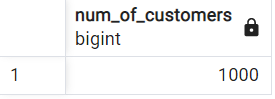

**2. What is the monthly distribution of trial plan start_date values for our dataset - use the start of the month as the group by value**

```sql
select
      extract(month from start_date) as Month,
      count(distinct(customer_id)) from subscriptions
where plan_id = 0
group by 1
order by 1
```

**Answer**

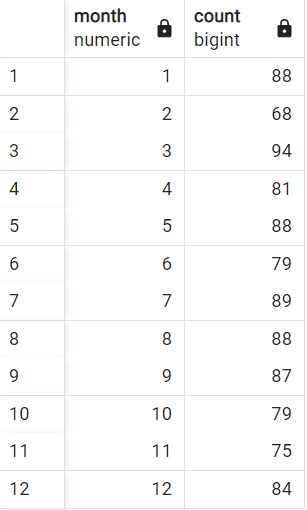

**3. What plan start_date values occur after the year 2020 for our dataset? Show the breakdown by count of events for each plan_name**

```sql
select
  p.plan_id,
  p.plan_name,
  count(sub.customer_id) as num_of_events
from subscriptions sub
join plans p
  on sub.plan_id = p.plan_id
where sub.start_date >= '2021-01-01'
group by p.plan_id, p.plan_name
order by p.plan_id;
```

**Answer**



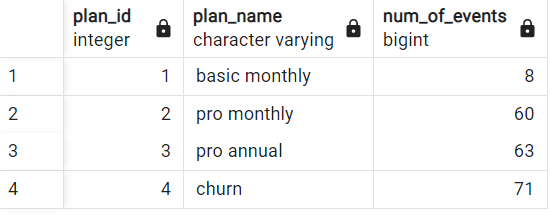

**4. What is the customer count and percentage of customers who have churned rounded to 1 decimal place?**

```sql
select
      count(customer_id),
	  round(count(customer_id)*100.0/ (select count(distinct(customer_id)) from subscriptions),1) as Churn_percentage
from subscriptions
where plan_id=4
```

**Answer**

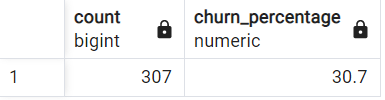

**5. How many customers have churned straight after their initial free trial - what percentage is this rounded to the nearest whole number?**

```sql
with ranked_cte as (
  select
      customer_id,
      plan_id,
	  row_number() over (
      partition by customer_id order by start_date) as row_num
  from subscriptions
)
  
select
	count(case when row_num = 2 and plan_id = 4  then 1 else 0 end) as churned_customers,
	ROUND(100.0 * count(case when row_num = 2 and plan_id = 4  then 1 else 0 end)
	  / (select count(distinct customer_id)
      from subscriptions)) as churn_percentage
from ranked_cte
where plan_id = 4 and row_num = 2;
-- Customers who have churned immediately after trial have churn plan ranked as 2 and will have plan_id=4.


**Answer**

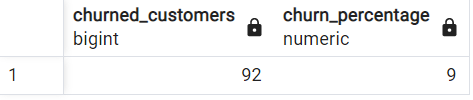

**6. What is the number and percentage of customer plans after their initial free trial?**

```sql
with next_plans as (
  select
    customer_id,
    plan_id,
    lead(plan_id) over(
      partition by customer_id
      order by plan_id) as next_plan_id
  from subscriptions
)

select
  next_plan_id as plan_id,
  count(customer_id) as converted_customers,
  ROUND(100 * count(customer_id)
    / (select count(distinct customer_id) from subscriptions),1) as conversion_percentage
from next_plans
where next_plan_id is not NULL
  and plan_id = 0
group by next_plan_id
order by next_plan_id;
```

**Answer**

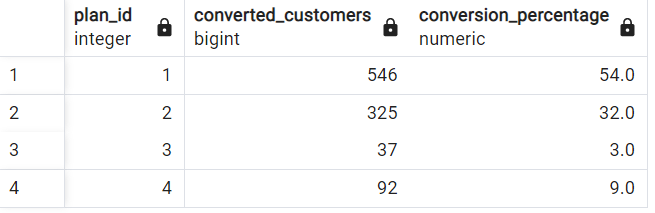

**7. What is the customer count and percentage breakdown of all 5 plan_name values at 2020-12-31?**

```sql
with after_trail as(
                
  select *,  
      row_number() over(
      partition by customer_id order by start_date desc) as row
  from subscriptions
  where start_date <= '2020-12-31'
)
  select
    plan_id,
    count(customer_id) as customers,
    round(count(customer_id)*100.0/(select count(distinct(customer_id)) from subscriptions),1) as Percentage
  from after_trail
  where row=1
  group by plan_id

--First CTE will create table which include customers and their current plan till 2020-12-31
--As I have order by descending to dates so last plan will be row number 1.
```

**OR**

```sql
with next_dates as (
  select
    customer_id,
    plan_id,
  	start_date,
    lead(start_date) over (partition by customer_id order by start_date) as next_date
  from subscriptions
  where start_date <= '2020-12-31'
)
select
	plan_id,
	count(distinct customer_id) as customers,
    ROUND(100.0 * count(distinct customer_id)
    / (select count(distinct customer_id) from subscriptions),1) as percentage
from next_dates
where next_date is NULL
group by plan_id;
```

**Answer**

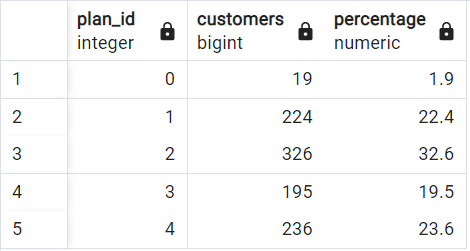

**8. How many customers have upgraded to an annual plan in 2020?**

```sql
select
      count(distinct customer_id) as num_of_customers
from subscriptions
where plan_id = 3 and start_date <= '2020-12-31';
```


**Answer**

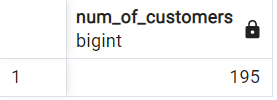

**9. How many days on average does it take for a customer to an annual plan from the day they join Foodie-Fi?**

```sql
with trial_plan as (
-- trial_plan CTE: Filter results to include only the customers subscribed to the trial plan.
  select
    customer_id,
    start_date as trial_date
  from subscriptions
  where plan_id = 0
), annual_plan as (
-- annual_plan CTE: Filter results to only include the customers subscribed to the pro annual plan.
  select
    customer_id,
    start_date as annual_date
  from subscriptions
  where plan_id = 3
)
-- Find the average of the differences between the start date of a trial plan and a pro annual plan.
select
  ROUND(
    avg(
      annual.annual_date - trial.trial_date)
  ,0) as avg_days_to_upgrade
from trial_plan as trial
join annual_plan as annual
  on trial.customer_id = annual.customer_id;
  
```


**Answer**

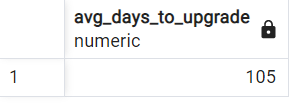

**10. Can you further breakdown this average value into 30 day periods (i.e. 0-30 days, 31-60 days etc)**

```sql
with trial_plan as (
-- trial_plan CTE: Filter results to include only the customers subscribed to the trial plan.
  select
    customer_id,
    start_date as trial_date
  from subscriptions
  where plan_id = 0
), annual_plan as (
-- annual_plan CTE: Filter results to only include the customers subscribed to the pro annual plan.
  select
    customer_id,
    start_date as annual_date
  from subscriptions
  where plan_id = 3
), bins as (
-- bins CTE: Put customers in 30-day buckets based on the average number of days taken to upgrade to a pro annual plan.
  select
    width_bucket(annual.annual_date - trial.trial_date, 0, 365, 12) as avg_days_to_upgrade
  from trial_plan as trial
  join annual_plan as annual
    on trial.customer_id = annual.customer_id
)
  
select
  ((avg_days_to_upgrade - 1) * 30 || ' - ' || avg_days_to_upgrade * 30 || ' days') as bucket,
  count(*) as num_of_customers
from bins
group by avg_days_to_upgrade
order by avg_days_to_upgrade;
```


**Answer**

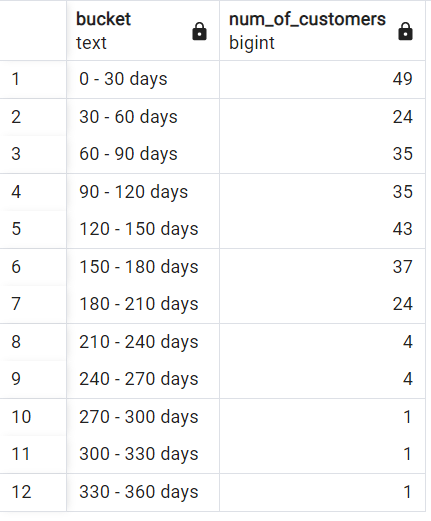

**11. How many customers downgraded from a pro monthly to a basic monthly plan in 2020?**

```sql
with ranked_cte as (
  select
    sub.customer_id,  
    p.plan_id,
    p.plan_name,
    lead(p.plan_id) over (
      partition by sub.customer_id
      order by sub.start_date) as next_plan_id
  from subscriptions as sub
  join plans as p on sub.plan_id = p.plan_id
  where date_part('year', start_date) = 2020
)
  
select
  count(customer_id) as churned_customers
from ranked_cte
where plan_id = 2 and next_plan_id = 1;
```

**Answer**


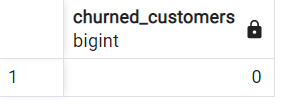